<a href="https://colab.research.google.com/github/anibahs/DSEM_INFO6105/blob/main/INFO6105_Assignment2_AutoML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Abstract**


The aim of the dataset is to predict the variable RainTomorrow, we did this earlier using Logistic Regression in Assignment, but on training using RFE found that it performed better.

Now we will use AutoML with H2O library to find the best suitable model, and try to improve our learning using machine learning techniques.

***Results***

# **Dataset**


The dataset includes observations of the climate in Australia of a period of 10 years and how the rainfall varies depending on other climate changes.

* Target Variable: 
  * RainTomorrow : The amount of next day rain in mm. Used to create response variable RainTomorrow. A kind of measure of the "risk".
* Independant Variables:
  * Date : date of observation
  * Location : region within Australia
  * MinTemp : Minimum temperature in teh day in degree Celsius
  * MaxTemp : Maximum temperature in teh day in degree Celsius
  * Rainfall : The amount of rainfall recorded for the day in mm
  * Evaporation : The so-called Class A pan evaporation (mm) in the 24 hours to 9am
  * Sunshine : The number of hours of bright sunshine in the day.
  * WindGustDir : The direction of the strongest wind gust in the 24 hours to midnight
  * WindGustSpeed : The speed (km/h) of the strongest wind gust in the 24 hours to midnight
  * WinDir9am : Direction of the wind at 9am
  * WinDir3pm : Direction of the wind at 3pm
  * WindSpeed9am : Wind speed (km/hr) averaged over 10 minutes prior to 9am
  * WindSpeed3pm : Wind speed (km/hr) averaged over 10 minutes prior to 3pm
  * Humidity9am : Humidity (percent) at 9am
  * Humidity3pm : Humidity (percent) at 3pm
  * Pressure9am : Atmospheric pressure (hpa) reduced to mean sea level at 9am
  * Pressure3pm : Atmospheric pressure (hpa) reduced to mean sea level at 3pm
  * Cloud9am : Fraction of sky obscured by cloud at 9am. This is measured in "oktas", which are a unit of eigths. It records how many
  * Cloud3pm : Fraction of sky obscured by cloud at 3pm. This is measured in "oktas", which are a unit of eigths. It records how many
  * Temp9am : Temperature (degrees C) at 3pm
  * Temp3pm : Temperature (degrees C) at 9am
  * RainToday : Boolean: 1 if precipitation (mm) in the 24 hours to 9am exceeds 1mm, otherwise 0



[Dataset on Kaggle](https://www.kaggle.com/datasets/jsphyg/weather-dataset-rattle-package)

# **AutoML**

### Importing required Libraries and H20 Initialization


In [ ]:
!pip install eli5
!pip install -q kaggle


!pip install requests
!pip install tabulate
!pip install "colorama>=0.3.8"
!pip install future

!pip install -f http://h2o-release.s3.amazonaws.com/h2o/latest_stable_Py.html h2o

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 216.2/216.2 KB 7.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for eli5: filename=eli5-0.13.0-py2.py3-none-any.whl size=107748 sha256=c72670cbd430ac33cd769dfa4f69968f4d13dfc245c14cd5a568c2f8d1a7bbf5
  Stored in directory: /root/.cache/pip/wheels/85/ac/25/ffcd87ef8f9b1eec324fdf339359be71f22612459d8c75d89c
Successfully built eli5
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
L

In [ ]:
import h2o
from h2o.automl import H2OAutoML
from h2o.estimators.glm import H2OGeneralizedLinearEstimator
from h2o.grid.grid_search import H2OGridSearch
from h2o.estimators.gbm import H2OGradientBoostingEstimator

import random, os, sys
from datetime import datetime
import pandas as pd
import logging
import csv
import optparse
import time
import json
from distutils.util import strtobool
import psutil
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
sns.set(context="notebook", palette="Spectral", style = 'darkgrid' ,font_scale = 1.5, color_codes=True)
import warnings
warnings.filterwarnings('ignore')
import os
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.compat import lzip
import statsmodels.stats.api as sms
from sklearn.model_selection import train_test_split as tts
from statsmodels.stats.outliers_influence import variance_inflation_factor
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LassoCV
from sklearn.linear_model import RidgeCV
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
from yellowbrick.regressor import ResidualsPlot
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV

import os

os.environ['KAGGLE_USERNAME'] = 'shabinasingh'
os.environ['KAGGLE_KEY'] = '4a64d2f32a2dec68f1b905c88bb66932'

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import skew

In [ ]:
min_mem_size=6 
run_time=240
pct_memory=0.5
virtual_memory=psutil.virtual_memory()
min_mem_size=int(round(int(pct_memory*virtual_memory.available)/1073741824,0))

In [ ]:
port_no=random.randint(5555,55555)

#  h2o.init(strict_version_check=False,min_mem_size_GB=min_mem_size,port=port_no) # start h2o
try:
  h2o.init(strict_version_check=False,min_mem_size_GB=min_mem_size,port=port_no) # start h2o
except:
  logging.critical('h2o.init')
  h2o.download_all_logs(dirname=logs_path, filename=logfile)      
  h2o.cluster().shutdown()
  sys.exit(2)

Checking whether there is an H2O instance running at http://localhost:17160..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "11.0.17" 2022-10-18; OpenJDK Runtime Environment (build 11.0.17+8-post-Ubuntu-1ubuntu220.04); OpenJDK 64-Bit Server VM (build 11.0.17+8-post-Ubuntu-1ubuntu220.04, mixed mode, sharing)
  Starting server from /usr/local/lib/python3.8/dist-packages/h2o/backend/bin/h2o.jar
  Ice root: /tmp/tmpupj76ga0
  JVM stdout: /tmp/tmpupj76ga0/h2o_unknownUser_started_from_python.out
  JVM stderr: /tmp/tmpupj76ga0/h2o_unknownUser_started_from_python.err
  Server is running at http://127.0.0.1:17160
Connecting to H2O server at http://127.0.0.1:17160 ... successful.


H2O_cluster_uptime:,05 secs
H2O_cluster_timezone:,Etc/UTC
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.40.0.1
H2O_cluster_version_age:,20 days
H2O_cluster_name:,H2O_from_python_unknownUser_3yykl0
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,6 Gb
H2O_cluster_total_cores:,2
H2O_cluster_allowed_cores:,2
H2O_cluster_status:,"locked, healthy"


In [ ]:
!mkdir ~/.kaggle
!kaggle datasets download -d jsphyg/weather-dataset-rattle-package
!unzip -o weather-dataset-rattle-package.zip -d /content

  0% 0.00/3.83M [00:00<?, ?B/s]
100% 3.83M/3.83M [00:00<00:00, 135MB/s]
Archive:  weather-dataset-rattle-package.zip
  inflating: /content/weatherAUS.csv  


### Loading dataset into H2o instance

In [ ]:
local_path = '/content/weatherAUS.csv'

In [ ]:
pd_data = pd.read_csv(local_path)
pd_data=pd_data.dropna()

### Check multicolinearity

In [ ]:
numerical_columns = pd_data.select_dtypes(include=['int','float','float64']).columns
print(pd_data[numerical_columns].describe())

            MinTemp       MaxTemp      Rainfall   Evaporation      Sunshine  \
count  56420.000000  56420.000000  56420.000000  56420.000000  56420.000000   
mean      13.464770     24.219206      2.130397      5.503135      7.735626   
std        6.416689      6.970676      7.014822      3.696282      3.758153   
min       -6.700000      4.100000      0.000000      0.000000      0.000000   
25%        8.600000     18.700000      0.000000      2.800000      5.000000   
50%       13.200000     23.900000      0.000000      5.000000      8.600000   
75%       18.400000     29.700000      0.600000      7.400000     10.700000   
max       31.400000     48.100000    206.200000     81.200000     14.500000   

       WindGustSpeed  WindSpeed9am  WindSpeed3pm   Humidity9am   Humidity3pm  \
count   56420.000000  56420.000000  56420.000000  56420.000000  56420.000000   
mean       40.877366     15.667228     19.786778     65.874123     49.601985   
std        13.335232      8.317005      8.510180

<AxesSubplot:>

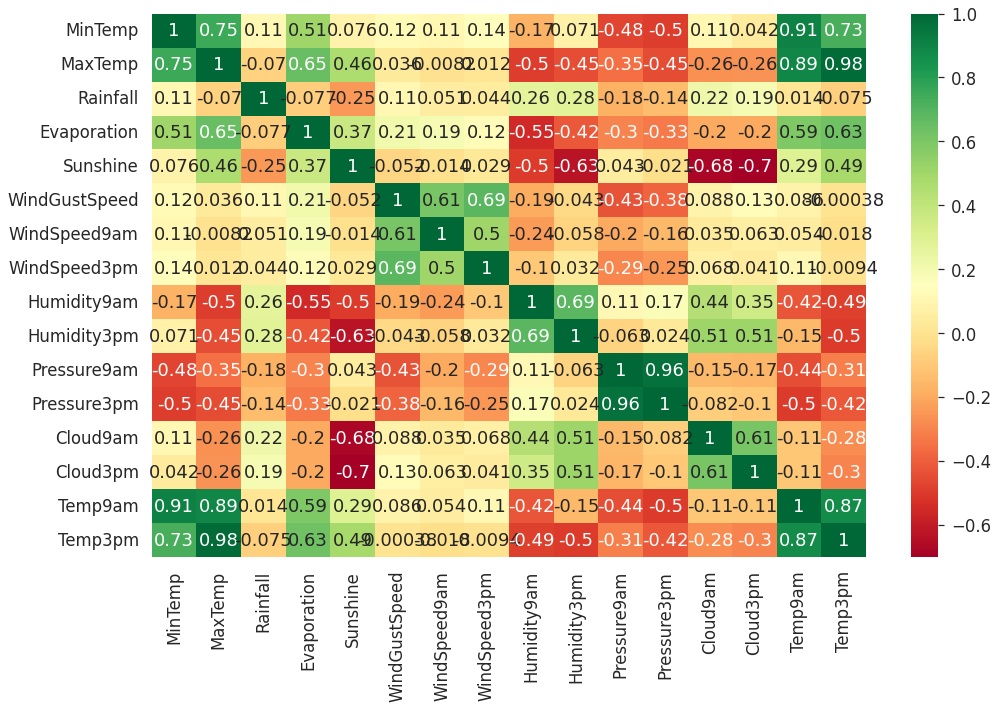

In [ ]:
#the heat map of the correlation
plt.figure(figsize=(16,10))
sns.heatmap(pd_data.corr(), annot=True, cmap='RdYlGn')

* We can see high positive correlation MinTemp and MaxTemp, Evaporation, Temp9am, Temp3pm. There is high negative correlation between MinTemp and Pressure3pm

* In case of MaxTemp, we see high positive correlation with Evaporation, Temp9am, Temp3pm and high negative correlation with Humidity9am

* For Evaporation we see high postive and negative corelation with Temp9am, Temp3pm and Humidity9am

* For sunshine, high negative correlation with Humidity9am, Humidity3pm, Cloud9am, Cloud3pm

* WindgustSpeed has high postive correlation with WindSpeed9am, WindSpeed3pm

* Humidity9am has high positive correlation with humidity3pm and negative with Temp3pm

* Pressure9am has high positive correlation with Pressure3pm

* Cloud9am has high positive correlation with Cloud3pm

* Temp9am has high positive correlation with Temp3pm





In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

#Indicate which variables to compute VIF
numeric = pd_data[numerical_columns].copy()
#Compute VIF
vif = pd.DataFrame()
vif["variables"] = numeric.columns
vif["VIF"] = [variance_inflation_factor(numeric.values, i) for i in range(numeric.shape[1])]
vif

,variables,VIF
0,MinTemp,58.190540
1,MaxTemp,608.110140
2,Rainfall,1.277233
3,Evaporation,7.155897
4,Sunshine,17.318673
5,WindGustSpeed,26.613591
6,WindSpeed9am,8.398002
7,WindSpeed3pm,13.743843
8,Humidity9am,60.250618
9,Humidity3pm,47.801216


We can see high VIF value for many variables like Pressure9am, Pressure3pn, Temp3pm, MaxTemp, Temp9am, Humidity9am, MinTemp, Humidity3pm etc.

## Estimation using OLS

In [ ]:
pd_data.columns

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')

In [ ]:
#look at categorical columns i.e. object type variables
categorical_columns = pd_data.select_dtypes(include=['object']).columns
print(categorical_columns)


Index(['Date', 'Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm',
       'RainToday', 'RainTomorrow'],
      dtype='object')


In [ ]:
# Impute categorical var with Mode
pd_data['WindGustDir'] = pd_data['WindGustDir'].fillna(pd_data['WindGustDir'].mode()[0])
pd_data['WindDir9am'] = pd_data['WindDir9am'].fillna(pd_data['WindDir9am'].mode()[0])
pd_data['WindDir3pm'] = pd_data['WindDir3pm'].fillna(pd_data['WindDir3pm'].mode()[0])
pd_data['RainToday'] = pd_data['RainToday'].fillna(pd_data['RainToday'].mode()[0])


In [ ]:
pd_data['Date'] = pd.to_datetime(pd_data['Date'])

pd_data['Year'] = pd_data['Date'].dt.year
pd_data['Month'] = pd_data['Date'].dt.month
pd_data['Day'] = pd_data['Date'].dt.day

pd_data = pd_data.drop('Date', axis=1)

pd_data = pd_data.dropna(axis=0, how='any', subset=["RainTomorrow"])

print(pd_data.shape)

pd_data.head(3)

(56420, 25)


,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Year,Month,Day
6049,Cobar,17.9,35.2,0.0,12.0,12.3,SSW,48.0,ENE,SW,...,1004.4,2.0,5.0,26.6,33.4,No,No,2009,1,1
6050,Cobar,18.4,28.9,0.0,14.8,13.0,S,37.0,SSE,SSE,...,1012.1,1.0,1.0,20.3,27.0,No,No,2009,1,2
6052,Cobar,19.4,37.6,0.0,10.8,10.6,NNE,46.0,NNE,NNW,...,1009.2,1.0,6.0,28.7,34.9,No,No,2009,1,4


### OLS

In [ ]:
# So we convert categorical features to continuous features with Label Encoding
from sklearn.preprocessing import LabelEncoder

lencoders = {}
features = ['Year', 'Month', 'Day', 'Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm',
       'RainToday', 'RainTomorrow']
for col in pd_data[features].columns:
    lencoders[col] = LabelEncoder()
    pd_data[col] = lencoders[col].fit_transform(pd_data[col])

In [ ]:
import statsmodels.api as sm

results = sm.OLS(pd_data["RainTomorrow"], pd_data[['Year', 'Month', 'Day', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow']]).fit()
       
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:           RainTomorrow   R-squared (uncentered):                   1.000
Model:                            OLS   Adj. R-squared (uncentered):              1.000
Method:                 Least Squares   F-statistic:                          4.946e+29
Date:                Wed, 01 Mar 2023   Prob (F-statistic):                        0.00
Time:                        02:52:13   Log-Likelihood:                      1.6736e+06
No. Observations:               56420   AIC:                                 -3.347e+06
Df Residuals:                   56395   BIC:                                 -3.347e+06
Df Model:                          25                                                  
Covariance Type:            nonrobust                                                  
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Year          -3.469e-18   5.52e-17     -0.063      0.950   -1.12e-16    1.05e-16
Month         -6.397e-18   4.17e-17     -0.153      0.878   -8.81e-17    7.53e-17
Day            -9.91e-18   1.52e-17     -0.652      0.514   -3.97e-17    1.99e-17
Location      -2.049e-17   1.94e-17     -1.057      0.290   -5.85e-17    1.75e-17
MinTemp       -9.302e-17   6.98e-17     -1.333      0.182    -2.3e-16    4.37e-17
MaxTemp       -5.204e-17   1.31e-16     -0.396      0.692    -3.1e-16    2.05e-16
Rainfall       6.343e-18   2.33e-17      0.272      0.785   -3.93e-17     5.2e-17
Evaporation    2.168e-18   5.45e-17      0.040      0.968   -1.05e-16    1.09e-16
Sunshine      -5.996e-17   6.58e-17     -0.911      0.362   -1.89e-16    6.91e-17
WindGustDir    4.409e-17   3.81e-17      1.158      0.247   -3.05e-17    1.19e-16
WindGustSpeed -7.779e-18   1.67e-17     -0.467      0.641   -4.05e-17    2.49e-17
WindDir9am    -2.629e-18    3.4e-17     -0.077      0.938   -6.92e-17    6.39e-17
WindDir3pm      6.18e-18   3.74e-17      0.165      0.869   -6.72e-17    7.95e-17
WindSpeed9am   5.101e-17    2.2e-17      2.318      0.020    7.87e-18    9.41e-17
WindSpeed3pm   1.952e-17   2.33e-17      0.838      0.402   -2.61e-17    6.52e-17
Humidity9am   -1.366e-17   1.53e-17     -0.894      0.371   -4.36e-17    1.63e-17
Humidity3pm    -4.43e-17   1.77e-17     -2.499      0.012   -7.91e-17   -9.55e-18
Pressure9am     4.77e-18   9.35e-17      0.051      0.959   -1.78e-16    1.88e-16
Pressure3pm    2.797e-17   9.36e-17      0.299      0.765   -1.56e-16    2.12e-16
Cloud9am       1.061e-16   7.17e-17      1.481      0.139   -3.43e-17    2.47e-16
Cloud3pm       -5.79e-17    7.6e-17     -0.761      0.446   -2.07e-16    9.11e-17
Temp9am        1.535e-16   1.03e-16      1.496      0.135   -4.76e-17    3.55e-16
Temp3pm        3.621e-17   1.48e-16      0.245      0.806   -2.53e-16    3.25e-16
RainToday       6.18e-17   4.28e-16      0.145      0.885   -7.76e-16       9e-16
RainTomorrow      1.0000   4.02e-16   2.49e+15      0.000       1.000       1.000
==============================================================================
Omnibus:                      569.781   Durbin-Watson:                   0.001
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              610.688
Skew:                          -0.222   Prob(JB):                    2.46e-133
Kurtosis:                       3.250   Cond. No.                     4.73e+03
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition n

From this we see that WindSpeed9am, Humidity3pm show high relationship significance as they have low p value.

## H2O training

### loading data into H2o

In [ ]:
#h2o_data = h2o.import_file(path = local_path)
h2o_data = h2o.H2OFrame(pd_data)

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [ ]:
h2o_data = h2o_data.na_omit()

In [ ]:
h2o_data.isna().sum()

0.0

In [ ]:
h2o_data.describe()

Rows:56420
Cols:23

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
type,time,enum,real,real,real,real,real,enum,int,enum,enum,int,int,int,int,real,real,int,int,real,real,enum,enum
mins,1193875200000.0,,-6.7,4.1,0.0,0.0,0.0,,9.0,,,2.0,2.0,0.0,0.0,980.5,977.1,0.0,0.0,-0.7,3.7,,
mean,1347862573952.5073,,13.464769585253478,24.219205955334978,2.1303970223325135,5.503135412974088,7.73562566465792,,40.877366182204845,,,15.667227933356953,19.786777738390715,65.87412265154235,49.60198511166261,1017.2395054945066,1014.7955795817077,4.24170506912441,4.326515420063807,18.204961006735292,22.710333215171925,,
maxs,1498348800000.0,,31.4,48.1,206.2,81.2,14.5,,124.0,,,67.0,76.0,100.0,100.0,1040.4,1038.9,8.0,9.0,39.4,46.1,,
sigma,76897631410.93538,,6.416688788530696,6.9706763871089255,7.014822227998485,3.6962822701317473,3.7581533156636424,,13.33523152956427,,,8.317004845694361,8.510180486546117,18.513289228936436,20.19703988286177,6.909356785644107,6.870891684998161,2.797162346749301,2.6472512911763766,6.567991221332225,6.836543115226232,,
zeros,0,,27,0,36709,128,1658,,0,,,0,0,1,3,0,0,5262,3470,1,0,,
missing,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
0,2009-01-01 00:00:00,Cobar,17.9,35.2,0.0,12.0,12.3,SSW,48.0,ENE,SW,6.0,20.0,20.0,13.0,1006.3,1004.4,2.0,5.0,26.6,33.4,No,No
1,2009-01-02 00:00:00,Cobar,18.4,28.9,0.0,14.8,13.0,S,37.0,SSE,SSE,19.0,19.0,30.0,8.0,1012.9,1012.1,1.0,1.0,20.3,27.0,No,No
2,2009-01-04 00:00:00,Cobar,19.4,37.6,0.0,10.8,10.6,NNE,46.0,NNE,NNW,30.0,15.0,42.0,22.0,1012.3,1009.2,1.0,6.0,28.7,34.9,No,No


In [ ]:
#h2o_data["Day"] = h2o_data["Date"].day()
#h2o_data["Month"] = h2o_data["Date"].month()
#h2o_data["Year"] = h2o_data["Date"].year()

In [ ]:
#h2o_data=h2o_data.drop(["Day","Date"], axis=1)

In [ ]:
h2o_data['RainTomorrow'] = h2o_data['RainTomorrow'].asfactor()

In [ ]:
print(len(h2o_data['Year'].unique()))

11


### Splitting dataset into 85:15 ratio for training 

In [ ]:
h2o_data_train, h2o_data_test = h2o_data.split_frame([0.85])

In [ ]:
print(h2o_data_train.shape)
print(h2o_data_test.shape)

(48013, 24)
(8407, 24)


In [ ]:
#Display all columns in X
X=h2o_data.columns
print(X)

['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm', 'RainToday', 'RainTomorrow', 'Year']


In [ ]:
#Seperate Dependent variable from Independent variable
y_cat ='RainTomorrow'
X.remove(y_cat) 
print(X)

['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm', 'RainToday', 'Year']


### Training H2o

In [ ]:
# Set up AutoML
aml = H2OAutoML(sort_metric = 'AUC', nfolds=4)

In [ ]:
#pass the data through H20AutoML
aml.train(x=X,y=y_cat,training_frame=h2o_data_train) 

AutoML progress: |███████████████████████████████████████████████████████████████| (done) 100%


key,value
Stacking strategy,cross_validation
Number of base models (used / total),26/92
# GBM base models (used / total),9/38
# XGBoost base models (used / total),13/41
# DeepLearning base models (used / total),3/10
# DRF base models (used / total),1/2
# GLM base models (used / total),0/1
Metalearner algorithm,GLM
Metalearner fold assignment scheme,Random
Metalearner nfolds,3


In [ ]:
print(aml.leaderboard)

model_id                                                     auc    logloss     aucpr    mean_per_class_error      rmse        mse
StackedEnsemble_AllModels_3_AutoML_1_20230301_25230     0.910869   0.298111  0.776563                0.183997  0.304094  0.0924733
StackedEnsemble_AllModels_4_AutoML_1_20230301_25230     0.910858   0.298157  0.776573                0.185738  0.304115  0.0924859
StackedEnsemble_BestOfFamily_4_AutoML_1_20230301_25230  0.908689   0.301112  0.772136                0.189029  0.305783  0.0935034
StackedEnsemble_AllModels_2_AutoML_1_20230301_25230     0.90867    0.301252  0.771974                0.19203   0.30586   0.0935503
StackedEnsemble_AllModels_1_AutoML_1_20230301_25230     0.908658   0.301294  0.772246                0.189827  0.305801  0.0935144
StackedEnsemble_BestOfFamily_3_AutoML_1_20230301_25230  0.907707   0.302638  0.769839                0.194948  0.306594  0.094
StackedEnsemble_BestOfFamily_2_AutoML_1_20230301_25230  0.907676   0.302841  0.769879  

In [ ]:
aml.leader.algo

'stackedensemble'

Without any EDA or preprocessing, H2o was able to find a stacked ensemble model as the best performing model with low MSE: 0.10 and RMSE: 0.33

### Analyse performance using test data

In [ ]:
best_model = aml.get_best_model()
print(best_model)

Model Details
H2OStackedEnsembleEstimator : Stacked Ensemble
Model Key: StackedEnsemble_AllModels_3_AutoML_1_20230301_25230


Model Summary for Stacked Ensemble: 
key                                        value
-----------------------------------------  ----------------
Stacking strategy                          cross_validation
Number of base models (used / total)       22/65
# GBM base models (used / total)           4/26
# XGBoost base models (used / total)       16/31
# DRF base models (used / total)           1/2
# DeepLearning base models (used / total)  1/5
# GLM base models (used / total)           0/1
Metalearner algorithm                      GLM
Metalearner fold assignment scheme         Random
Metalearner nfolds                         4
Metalearner fold_column
Custom metalearner hyperparameters         None

ModelMetricsBinomialGLM: stackedensemble
** Reported on train data. **

MSE: 0.03566338722096285
RMSE: 0.1888475237353216
LogLoss: 0.1459560726993258
AUC: 0.994224217

In [ ]:
best_model.model_performance(h2o_data_test)

ModelMetricsBinomialGLM: stackedensemble
** Reported on test data. **

MSE: 0.09417407740690202
RMSE: 0.30687795197260753
LogLoss: 0.30168608888687753
AUC: 0.9064273260721929
AUCPR: 0.7667127325411367
Gini: 0.8128546521443858
Null degrees of freedom: 8357
Residual degrees of freedom: 8335
Null deviance: 8747.900725562753
Residual deviance: 5042.984661833045
AIC: 5088.984661833045

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.345338614153651
       0     1     Error    Rate
-----  ----  ----  -------  ---------------
0      5867  676   0.1033   (676.0/6543.0)
1      518   1297  0.2854   (518.0/1815.0)
Total  6385  1973  0.1429   (1194.0/8358.0)

Maximum Metrics: Maximum metrics at their respective thresholds
metric                       threshold    value     idx
---------------------------  -----------  --------  -----
max f1                       0.345339     0.684794  207
max f2                       0.164899     0.764871  280
max f0point5                 0.617113     0.719987  116
max accuracy                 0.564631     0.866236  133
max precision                0.991456     1         0
max recall                   0.00798828   1         391
max specificity              0.991456     1         0
max absolute_mcc             0.395734     0.597803  190
max min_per_class_accuracy   0.217123     0.823323  259
max mean_per_class_accuracy  0.204541     0.824617  264
max tns                      0.991456     6543      0
max fns                      0.991456     1808      0
max fps                      0.00188529   6543      399
max tps                      0.00798828   1815      391
max tnr                      0.991456     1         0
max fnr                      0.991456     0.996143  0
max fpr                      0.00188529   1         399
max tpr                      0.00798828   1         391

Gains/Lift Table: Avg response rate: 21.72 %, avg score: 21.61 %
group    cumulative_data_fraction    lower_threshold    lift       cumulative_lift    response_rate    score       cumulative_response_rate    cumulative_score    capture_rate    cumulative_capture_rate    gain      cumulative_gain    kolmogorov_smirnov
-------  --------------------------  -----------------  ---------  -----------------  ---------------  ----------  --------------------------  ------------------  --------------  -------------------------  --------  -----------------  --------------------
1        0.0100503                   0.976299           4.60496    4.60496            1                0.982511    1                           0.982511            0.046281        0.046281                   360.496   360.496            0.046281
2        0.0201005                   0.960182           4.49532    4.55014            0.97619          0.968554    0.988095                    0.975533            0.0451791       0.0914601                  349.532   355.014            0.0911544
3        0.0300311                   0.942991           4.494      4.53157            0.975904         0.951422    0.984064                    0.96756             0.0446281       0.136088                   349.4     353.157            0.135477
4        0.0400814                   0.916564           4.16639    4.44               0.904762         0.930081    0.964179                    0.958162            0.0418733       0.177961                   316.639   344                0.176127
5        0.050012                    0.886851           4.10563    4.37361            0.891566         0.903581    0.949761                    0.947324            0.0407713       0.218733                   310.563   337.361            0.215523
6        0.100024                    0.713884           3.65753    4.01557            0.794258         0.801102    0.87201                     0.874213            0.18292         0.401653                   265.753   301.557            0.3853
7        0.150036                    0.554024           2.68806    3.57307            0.583732         0.628988    0.775917 

## Model explainability



### Leaderboard

In [ ]:
explain_model = aml.explain(frame = h2o_data_test, figsize = (8,6),include_explanations=['leaderboard'])

# Leaderboard

> Leaderboard shows models with their metrics. When provided with H2OAutoML object, the leaderboard shows 5-fold cross-validated metrics by default (depending on the H2OAutoML settings), otherwise it shows metrics computed on the frame. At most 20 models are shown by default.

model_id,auc,logloss,aucpr,mean_per_class_error,rmse,mse,training_time_ms,predict_time_per_row_ms,algo
StackedEnsemble_AllModels_4_AutoML_1_20230301_25230,0.906427,0.301686,0.766713,0.194358,0.306878,0.0941741,16037,0.333286,StackedEnsemble
StackedEnsemble_AllModels_3_AutoML_1_20230301_25230,0.906427,0.301686,0.766713,0.194358,0.306878,0.0941741,19264,0.19533,StackedEnsemble
StackedEnsemble_AllModels_2_AutoML_1_20230301_25230,0.904965,0.303564,0.764355,0.189088,0.307859,0.094777,4612,0.134447,StackedEnsemble
StackedEnsemble_AllModels_1_AutoML_1_20230301_25230,0.904605,0.304169,0.763734,0.191342,0.308047,0.0948931,3888,0.107272,StackedEnsemble
StackedEnsemble_BestOfFamily_4_AutoML_1_20230301_25230,0.904319,0.303849,0.764265,0.195842,0.308203,0.0949889,3300,0.086414,StackedEnsemble
StackedEnsemble_BestOfFamily_3_AutoML_1_20230301_25230,0.903636,0.305145,0.761529,0.193958,0.30888,0.0954071,3863,0.085804,StackedEnsemble
StackedEnsemble_BestOfFamily_5_AutoML_1_20230301_25230,0.903291,0.428289,0.760282,0.199397,0.365872,0.133862,2329,0.086842,StackedEnsemble
StackedEnsemble_BestOfFamily_2_AutoML_1_20230301_25230,0.902585,0.306813,0.759727,0.187198,0.309733,0.0959346,3226,0.061027,StackedEnsemble
StackedEnsemble_BestOfFamily_1_AutoML_1_20230301_25230,0.902204,0.307703,0.758971,0.192834,0.310155,0.0961962,3505,0.036067,StackedEnsemble
GBM_4_AutoML_1_20230301_25230,0.901918,0.310565,0.754938,0.19619,0.311421,0.096983,11859,0.04706,GBM


### Confusion Matrix

In [ ]:
explain_model = aml.explain(frame = h2o_data_test, figsize = (8,6),include_explanations=['confusion_matrix'])

# Confusion Matrix

> Confusion matrix shows a predicted class vs an actual class.

## StackedEnsemble_AllModels_3_AutoML_1_20230301_25230

,0,1,Error,Rate
0,5867.0,676.0,0.1033,(676.0/6543.0)
1,518.0,1297.0,0.2854,(518.0/1815.0)
Total,6385.0,1973.0,0.1429,(1194.0/8358.0)


### Learning curve plot

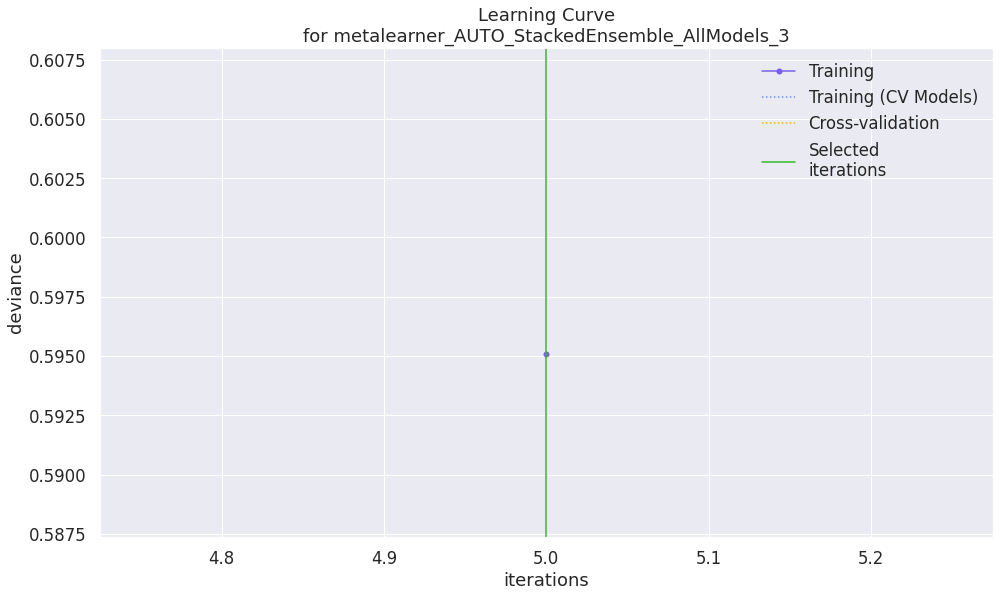

In [ ]:
best_model.learning_curve_plot()

### Variable Importance

# Variable Importance

> The variable importance plot shows the relative importance of the most important variables in the model.

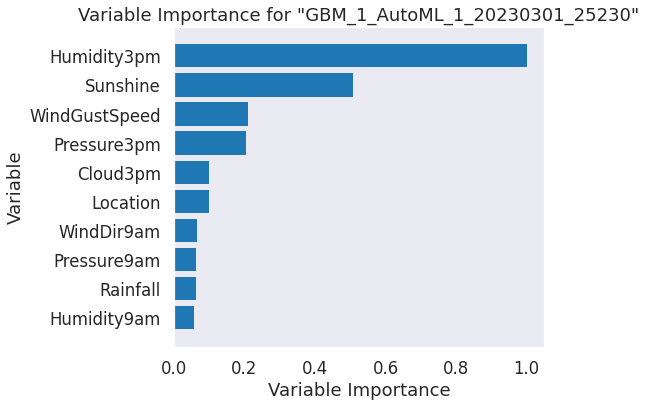

In [ ]:
explain_model = aml.explain(frame = h2o_data_test, figsize = (8,6),include_explanations=['varimp'])

In [ ]:
model_index = 0
glm_index = 0
glm_model = ""
aml_leaderboard_df = aml.leaderboard.as_data_frame()
models_dict = {}
for m in aml_leaderboard_df["model_id"]:
    models_dict[m] = model_index
    if "StackedEnsemble" not in m:
        break
    model_index = model_index + 1

for m in aml_leaderboard_df["model_id"]:
    if "GLM" in m:
        models_dict[m] = glm_index
        break
    glm_index = glm_index + 1
models_dict

{'StackedEnsemble_AllModels_3_AutoML_1_20230301_25230': 0,
 'StackedEnsemble_AllModels_4_AutoML_1_20230301_25230': 1,
 'StackedEnsemble_BestOfFamily_4_AutoML_1_20230301_25230': 2,
 'StackedEnsemble_AllModels_2_AutoML_1_20230301_25230': 3,
 'StackedEnsemble_AllModels_1_AutoML_1_20230301_25230': 4,
 'StackedEnsemble_BestOfFamily_3_AutoML_1_20230301_25230': 5,
 'StackedEnsemble_BestOfFamily_2_AutoML_1_20230301_25230': 6,
 'StackedEnsemble_BestOfFamily_1_AutoML_1_20230301_25230': 7,
 'StackedEnsemble_BestOfFamily_5_AutoML_1_20230301_25230': 8,
 'GBM_1_AutoML_1_20230301_25230': 9,
 'GLM_1_AutoML_1_20230301_25230': 69}

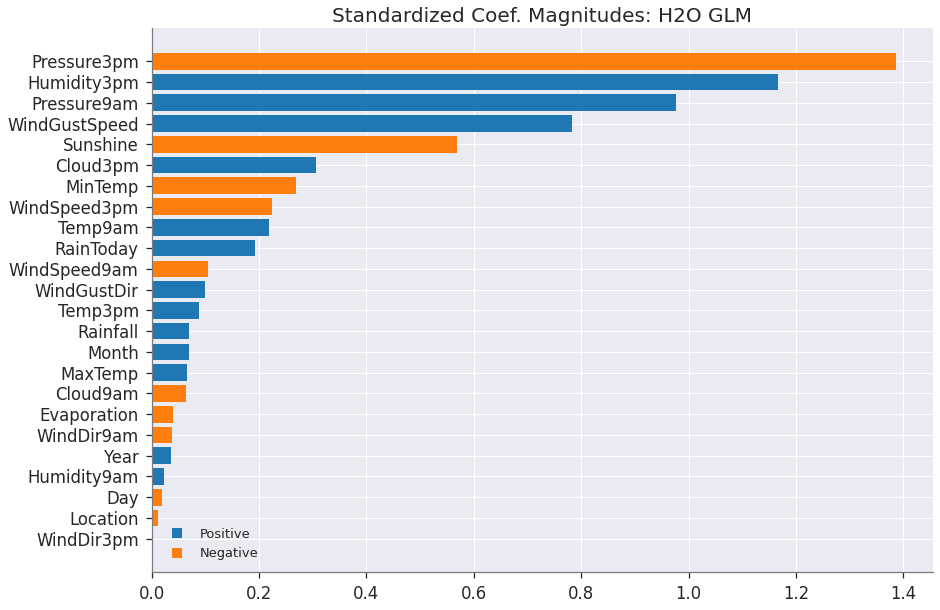

In [ ]:
if glm_index is not 0:
    glm_model = h2o.get_model(aml.leaderboard[glm_index, "model_id"])
    glm_model.std_coef_plot()

# Variable Importance Heatmap

> Variable importance heatmap shows variable importance across multiple models. Some models in H2O return variable importance for one-hot (binary indicator) encoded versions of categorical columns (e.g. Deep Learning, XGBoost). In order for the variable importance of categorical columns to be compared across all model types we compute a summarization of the the variable importance across all one-hot encoded features and return a single variable importance for the original categorical feature. By default, the models and variables are ordered by their similarity.

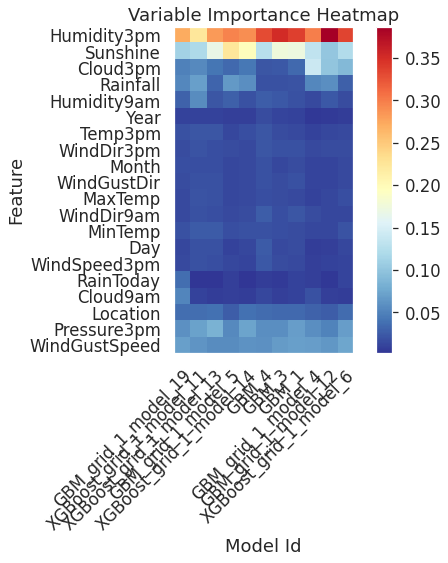

In [ ]:
explain_model = aml.explain(frame = h2o_data_test, figsize = (8,6),include_explanations=['varimp_heatmap'])

We see that Humidity3pm, Pressure3pm, WindGustSpeed, Sunshine, Pressure9am have a significantly higher importance score than other features.

Also specifically for GBM based models, WindDir9am, WindDir3pm amd WindGustDir have high importance as well which did not do as well with other models.

### Model Correlation

# Model Correlation

> This plot shows the correlation between the predictions of the models. For classification, frequency of identical predictions is used. By default, models are ordered by their similarity (as computed by hierarchical clustering). Interpretable models, such as GAM, GLM, and RuleFit are highlighted using red colored text.

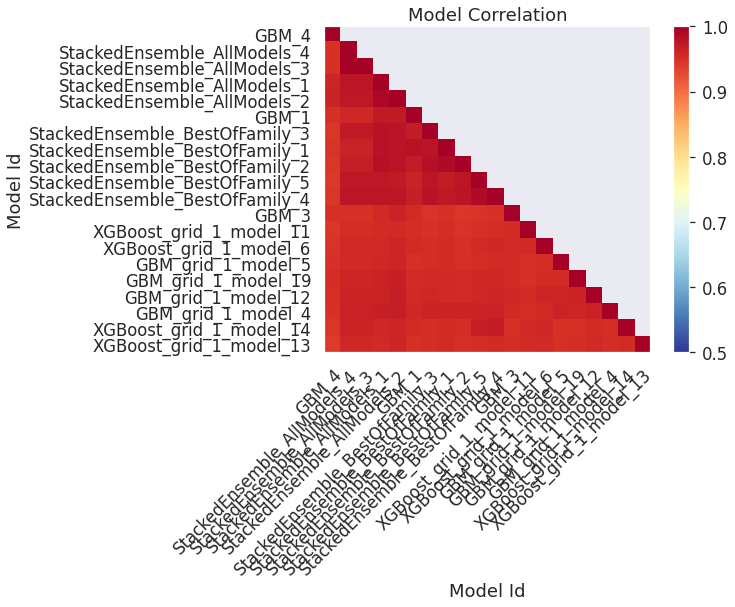

In [ ]:
explain_model = aml.explain(frame = h2o_data_test, figsize = (8,6),include_explanations=['model_correlation_heatmap'])

### SHAP Summary

# SHAP Summary

> SHAP summary plot shows the contribution of the features for each instance (row of data). The sum of the feature contributions and the bias term is equal to the raw prediction of the model, i.e., prediction before applying inverse link function.

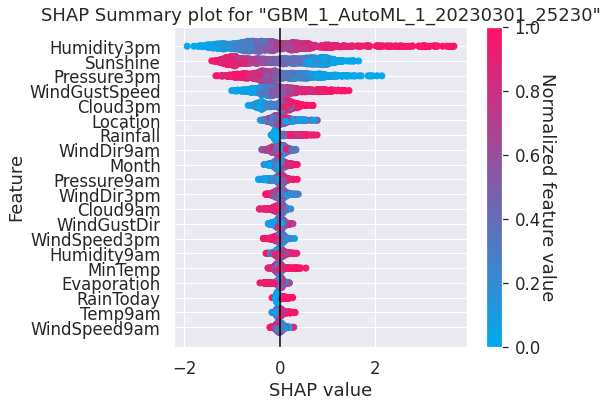

In [ ]:
explain_model = aml.explain(frame = h2o_data_test, figsize = (8,6),include_explanations=['shap_summary'])

### Partial Dependance Plots

# Partial Dependence Plots

> Partial dependence plot (PDP) gives a graphical depiction of the marginal effect of a variable on the response. The effect of a variable is measured in change in the mean response. PDP assumes independence between the feature for which is the PDP computed and the rest.

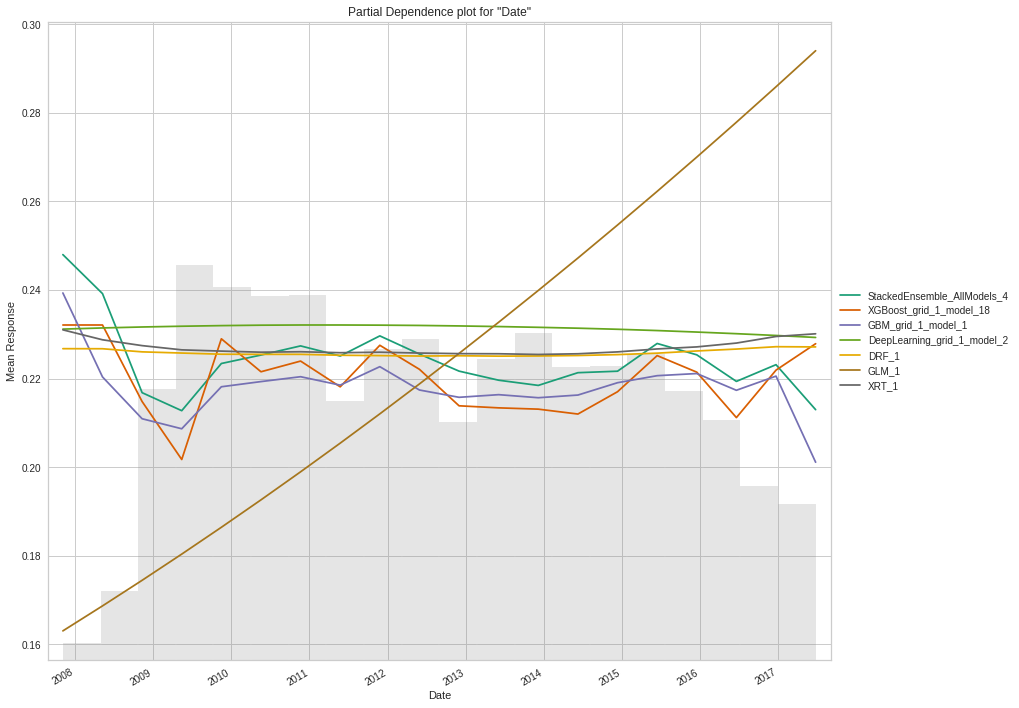

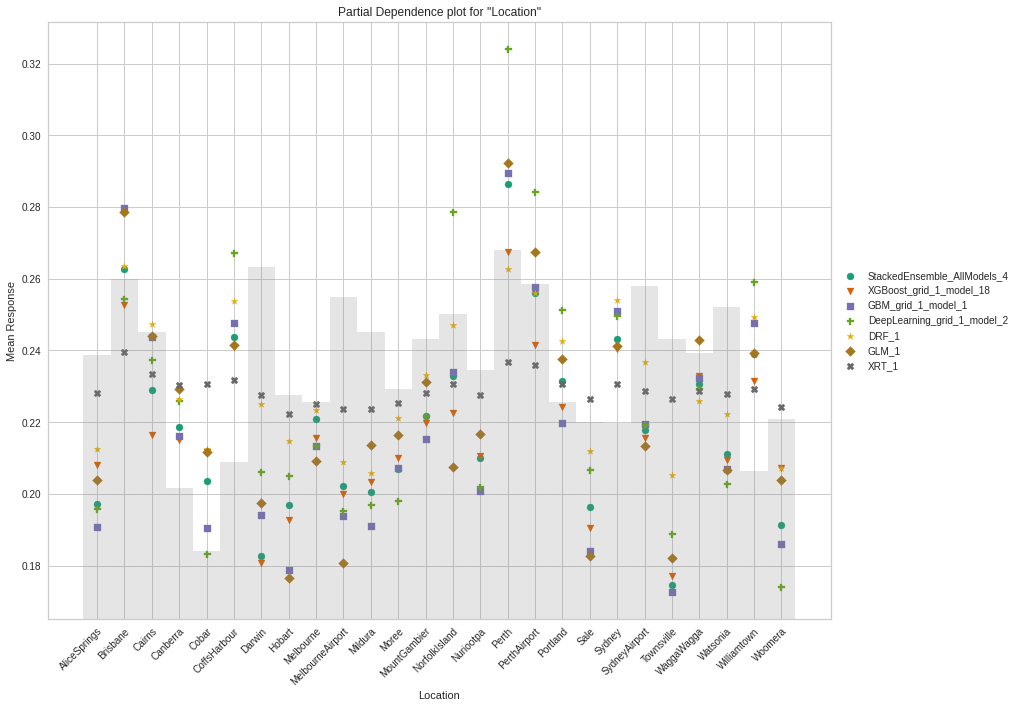

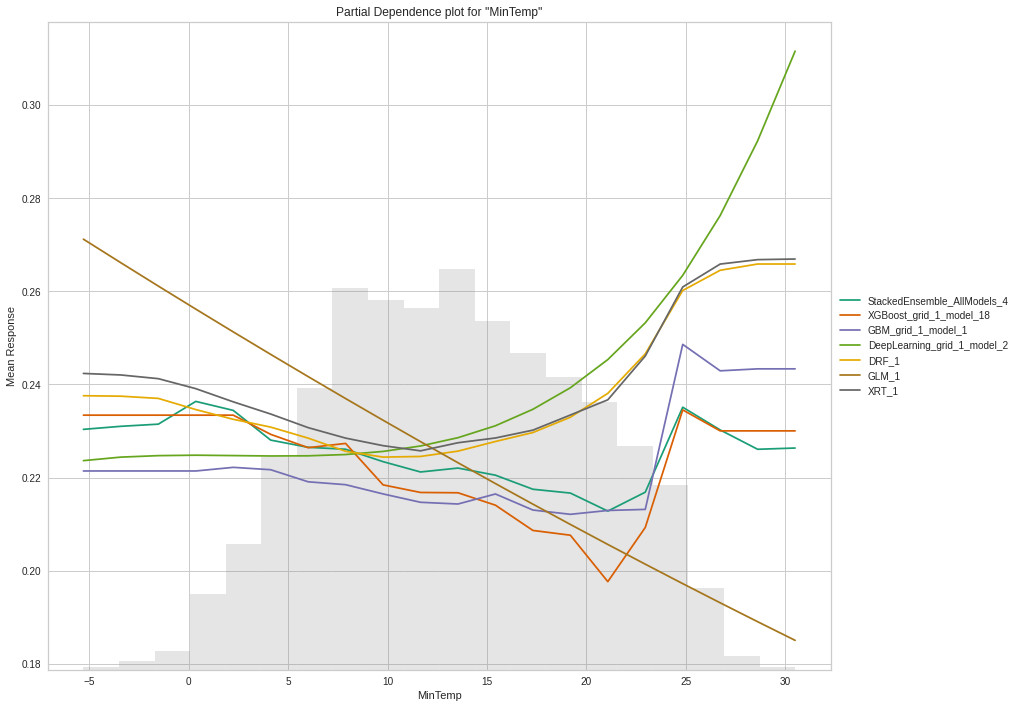

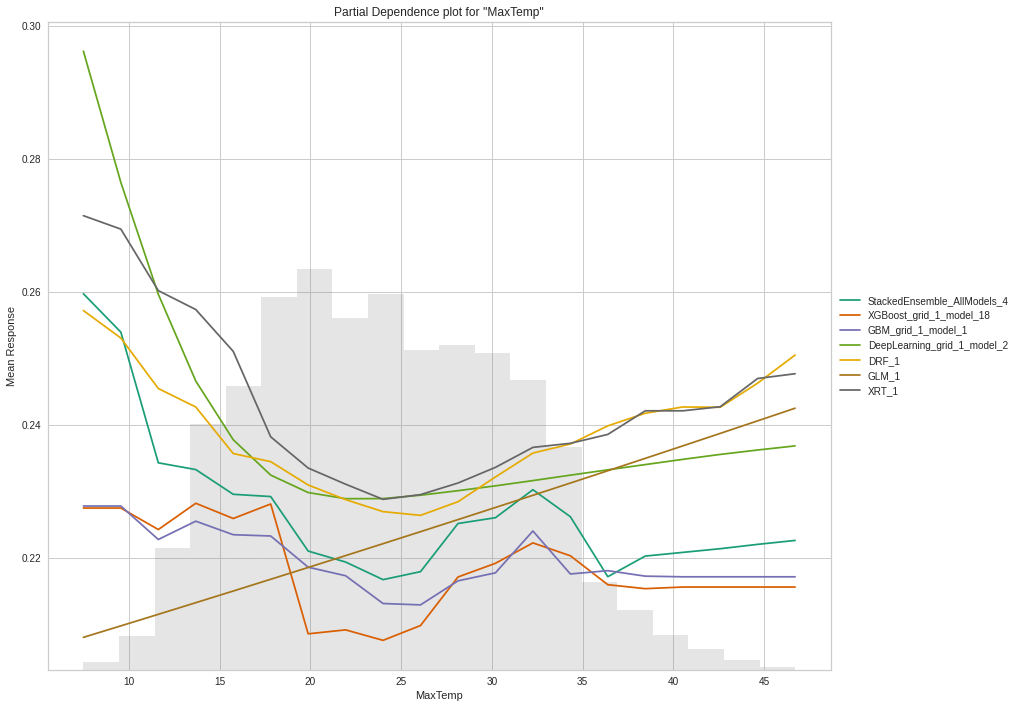

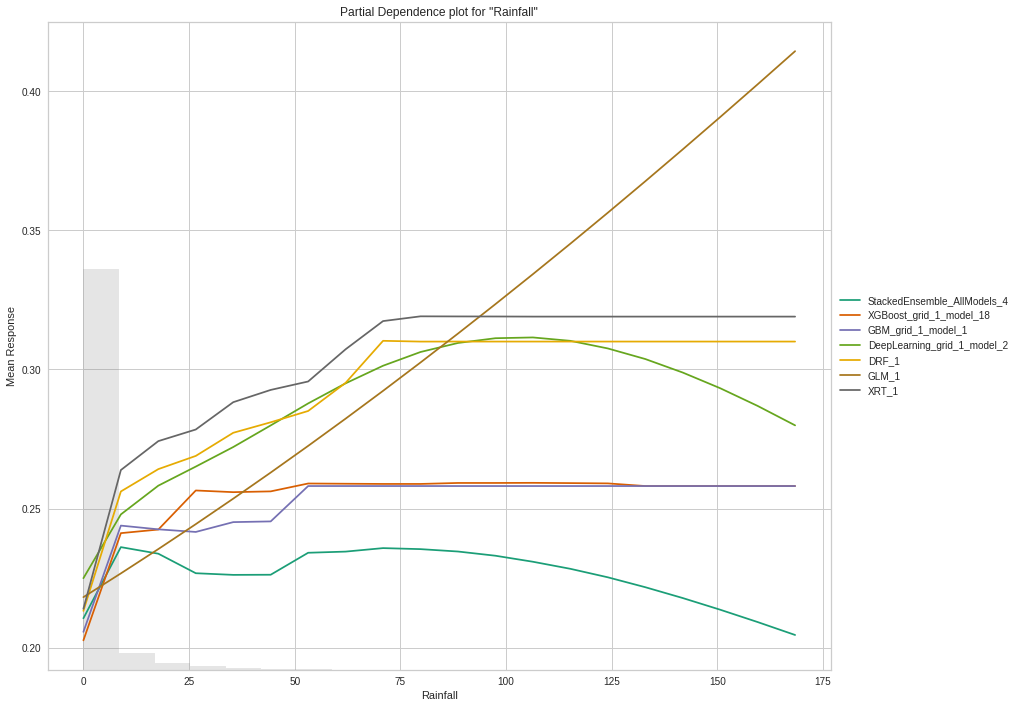

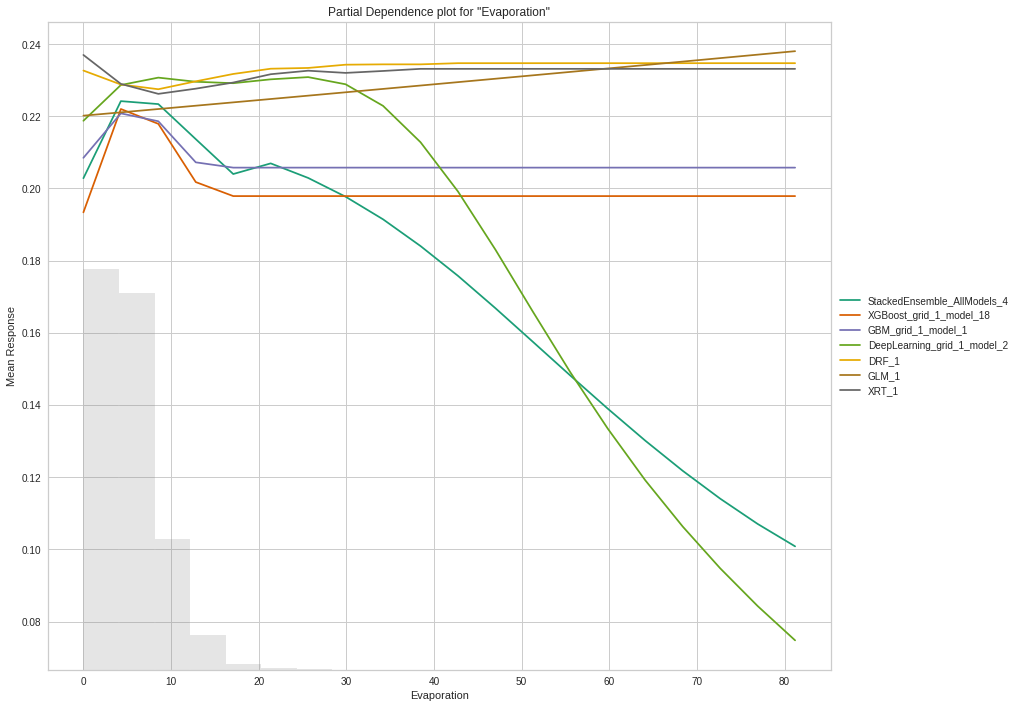

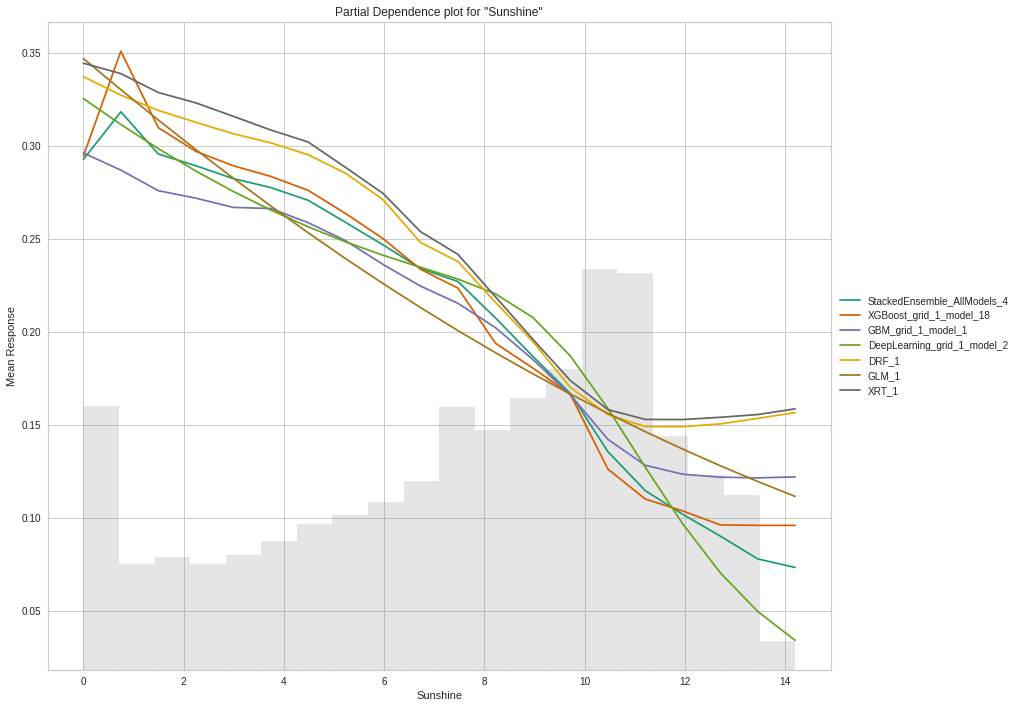

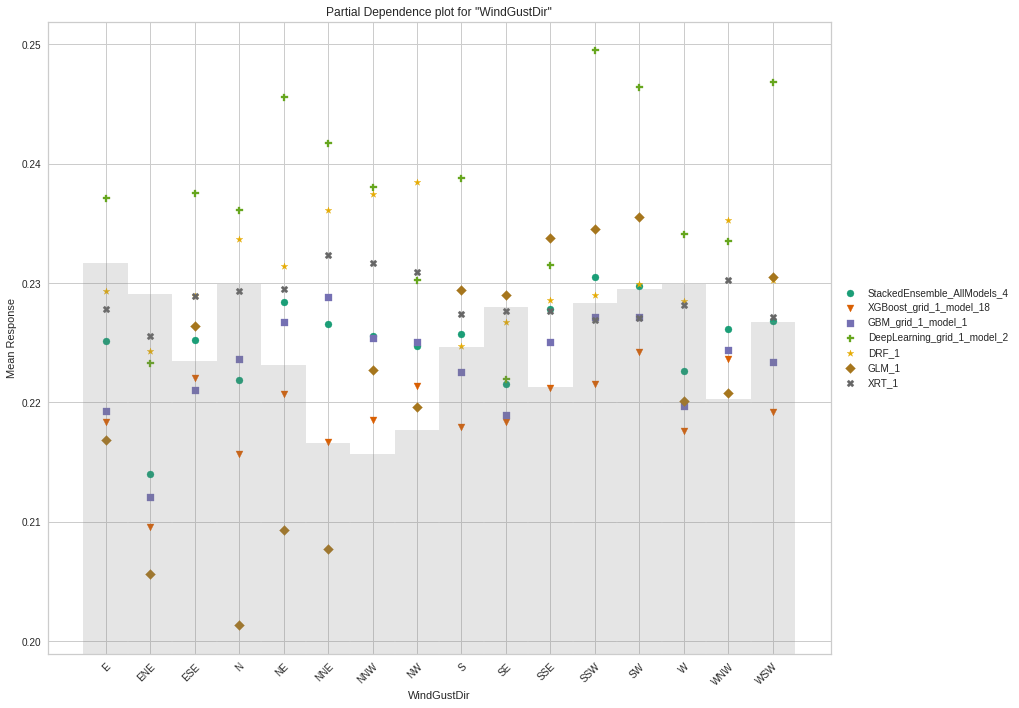

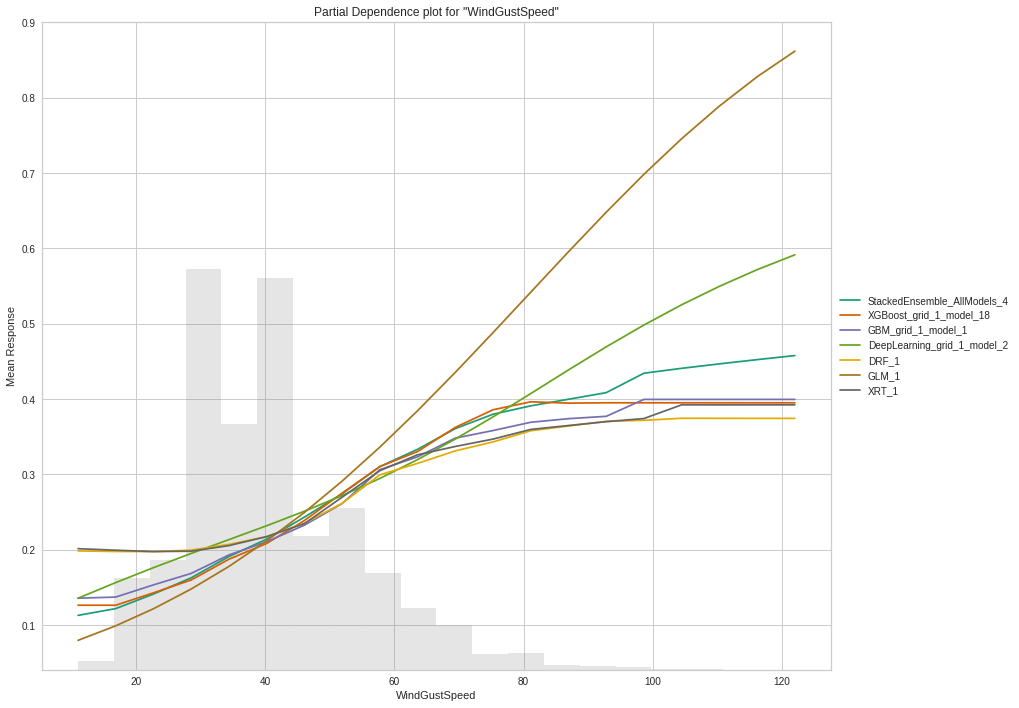

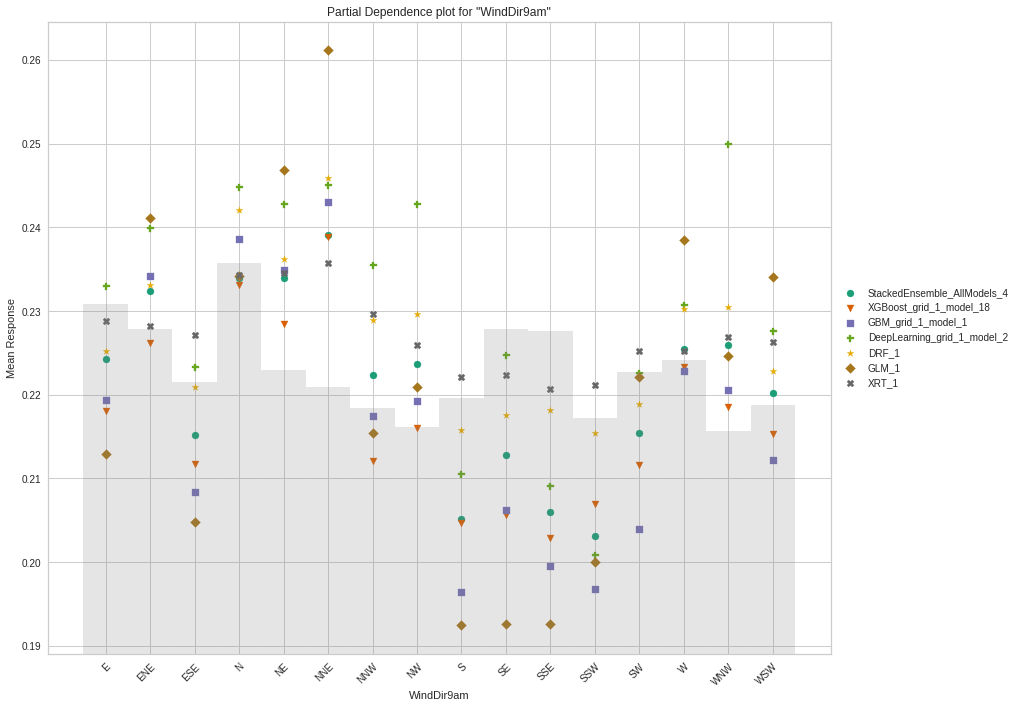

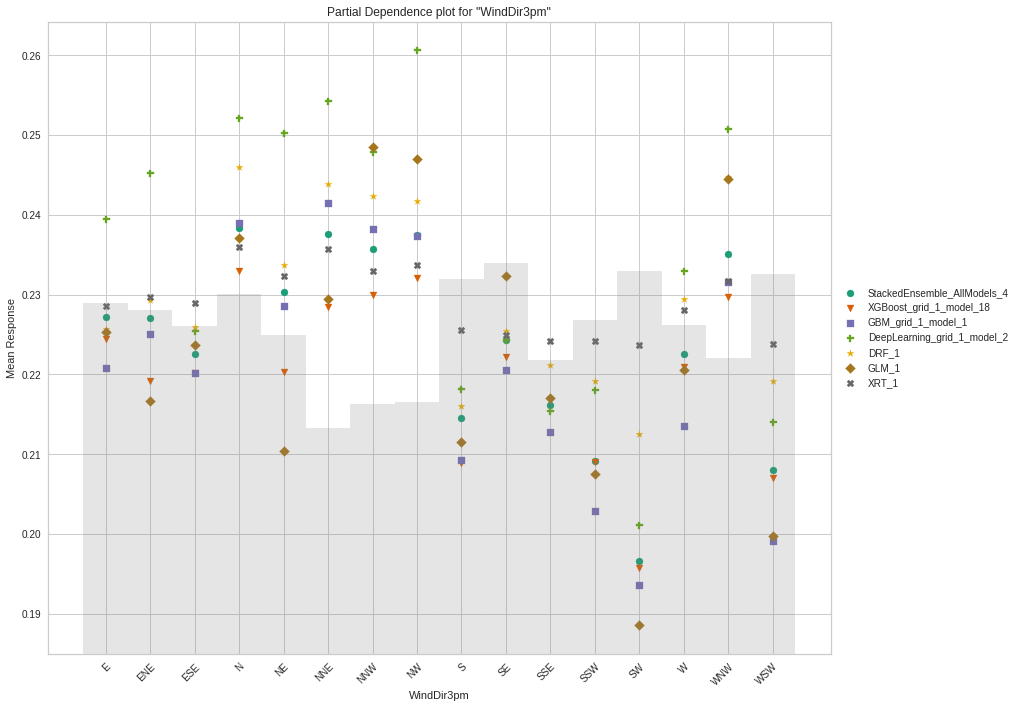

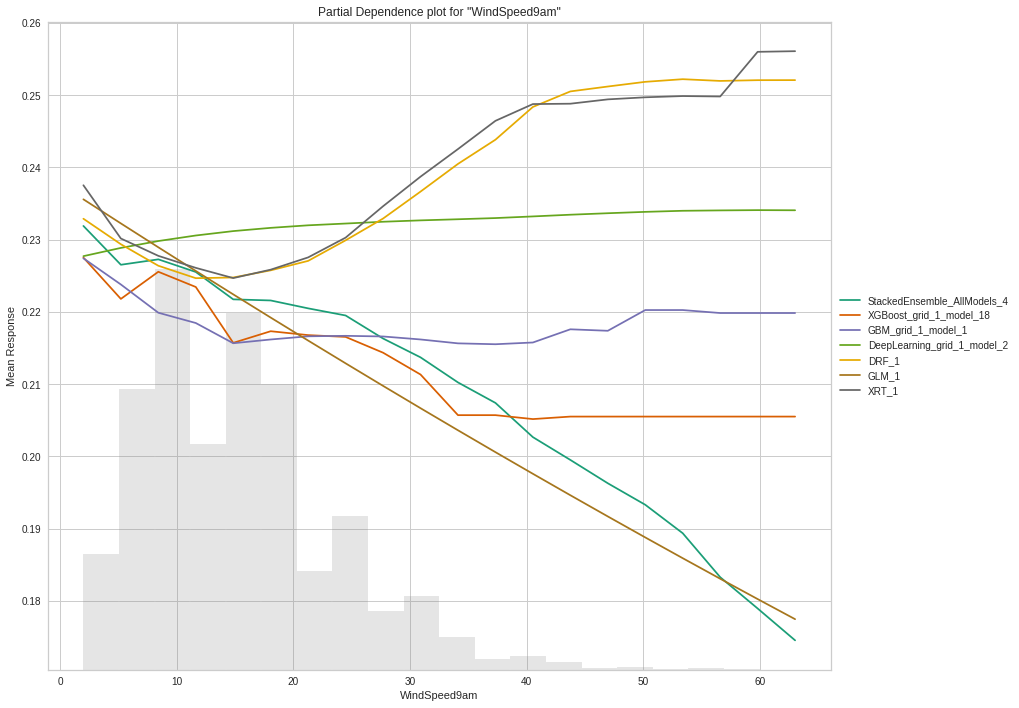

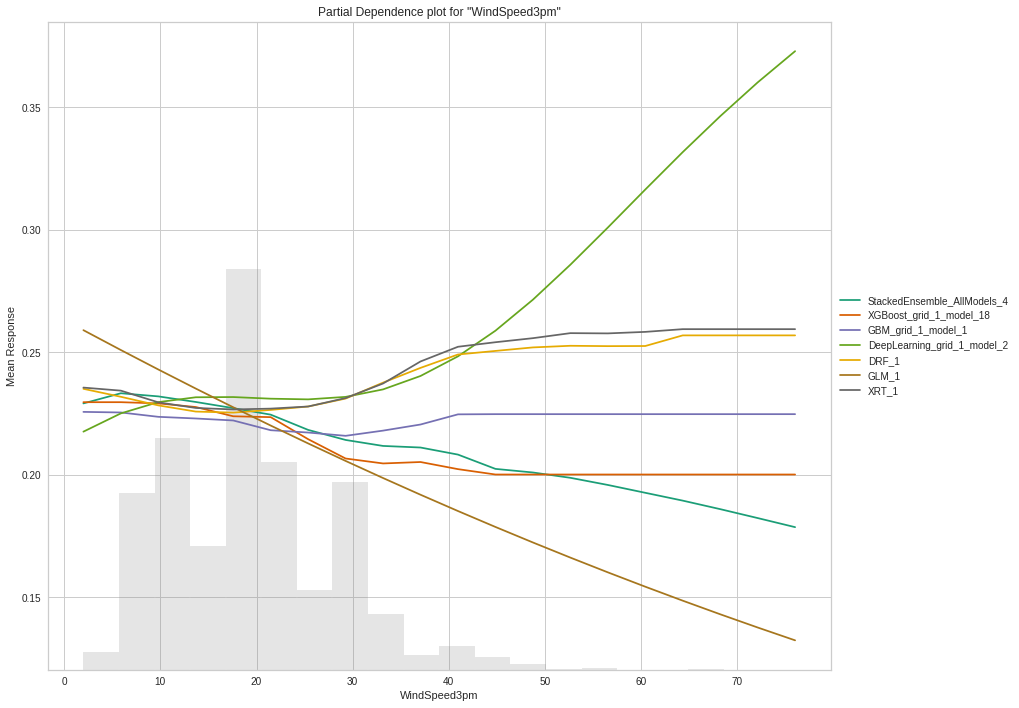

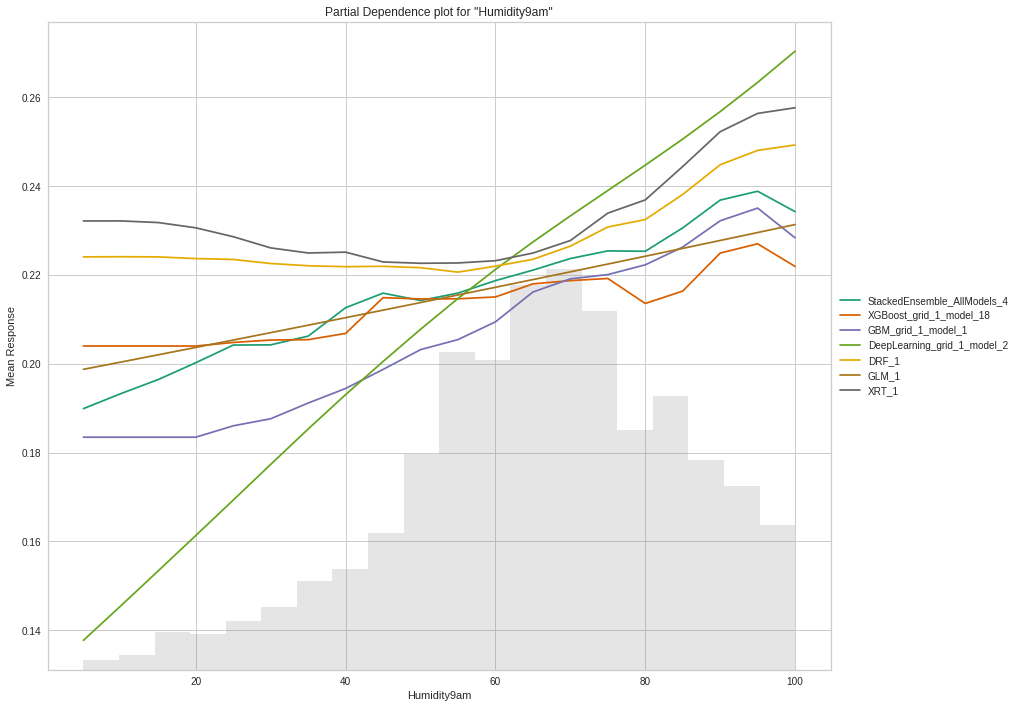

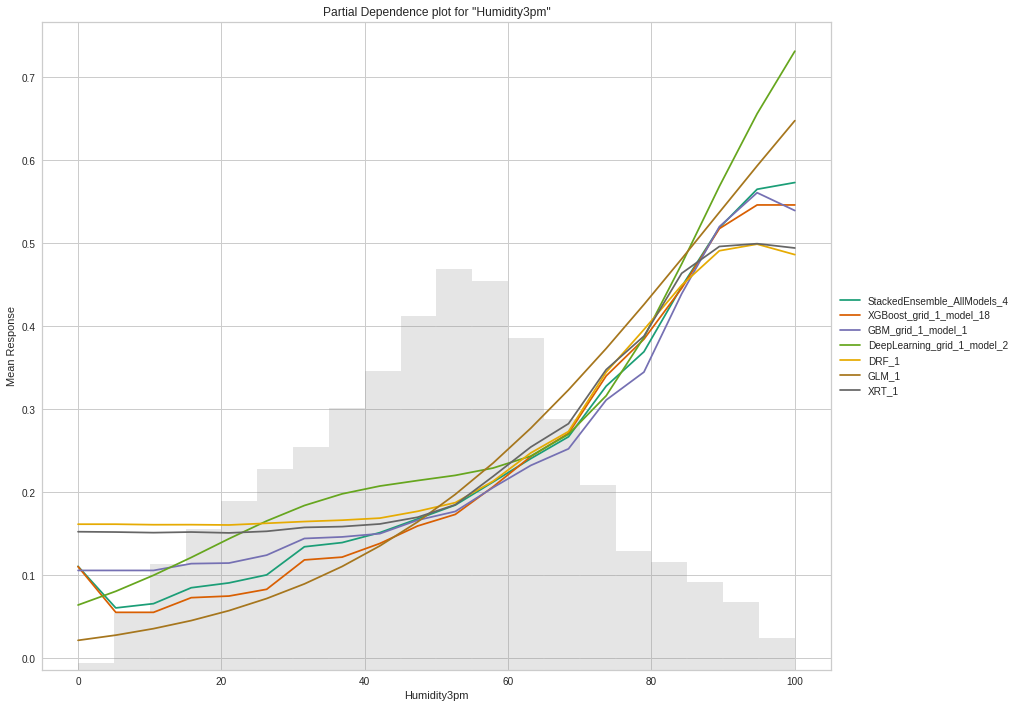

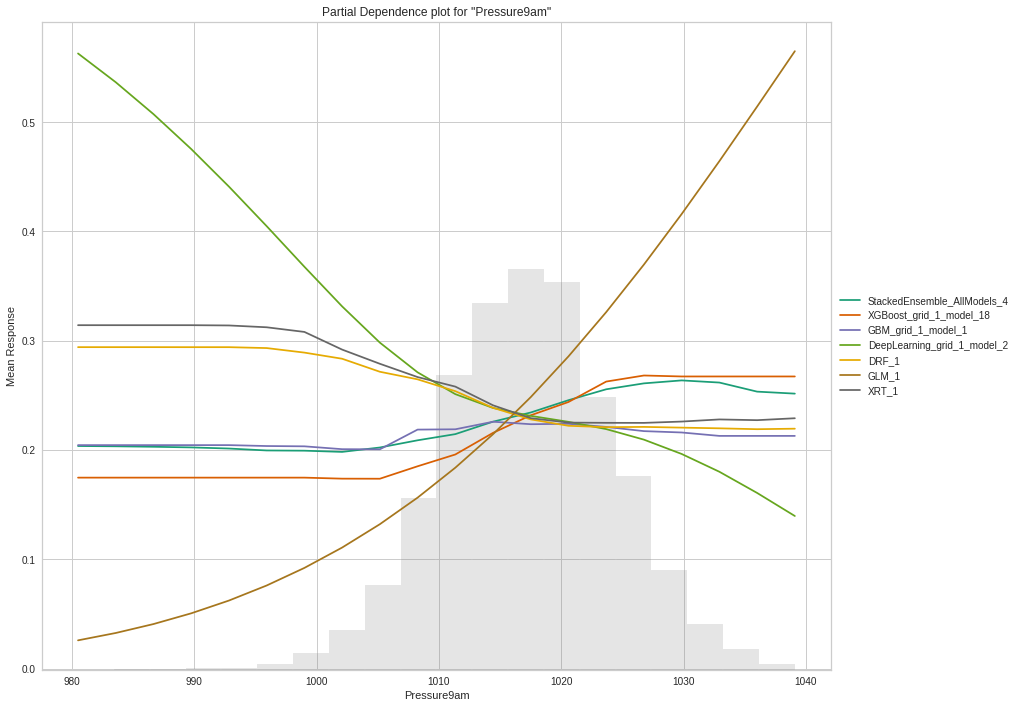

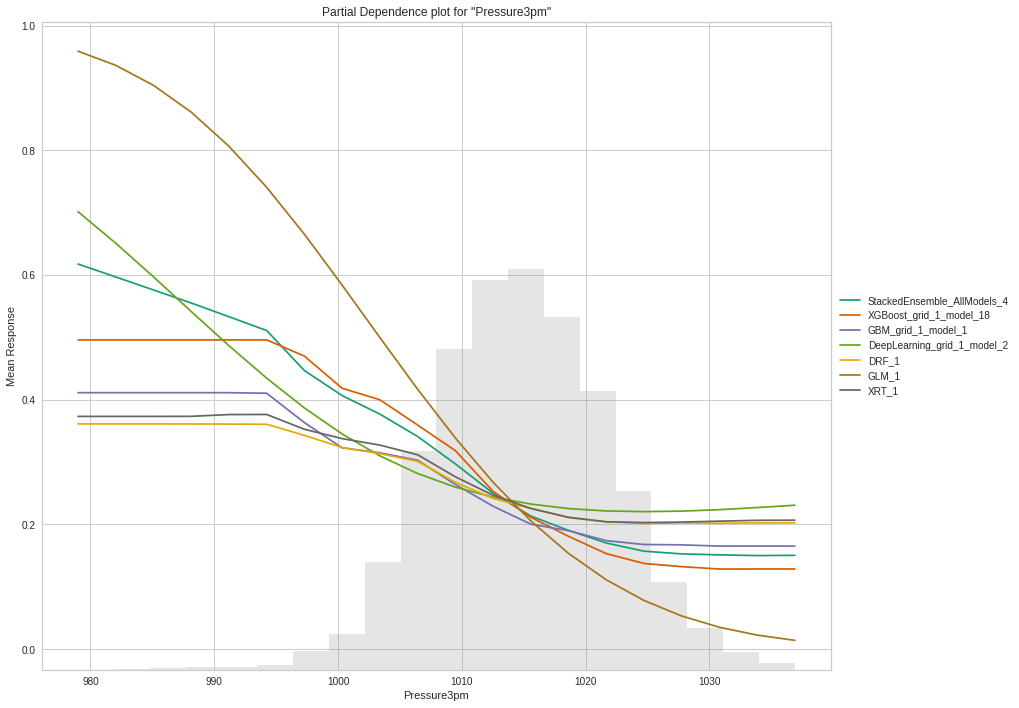

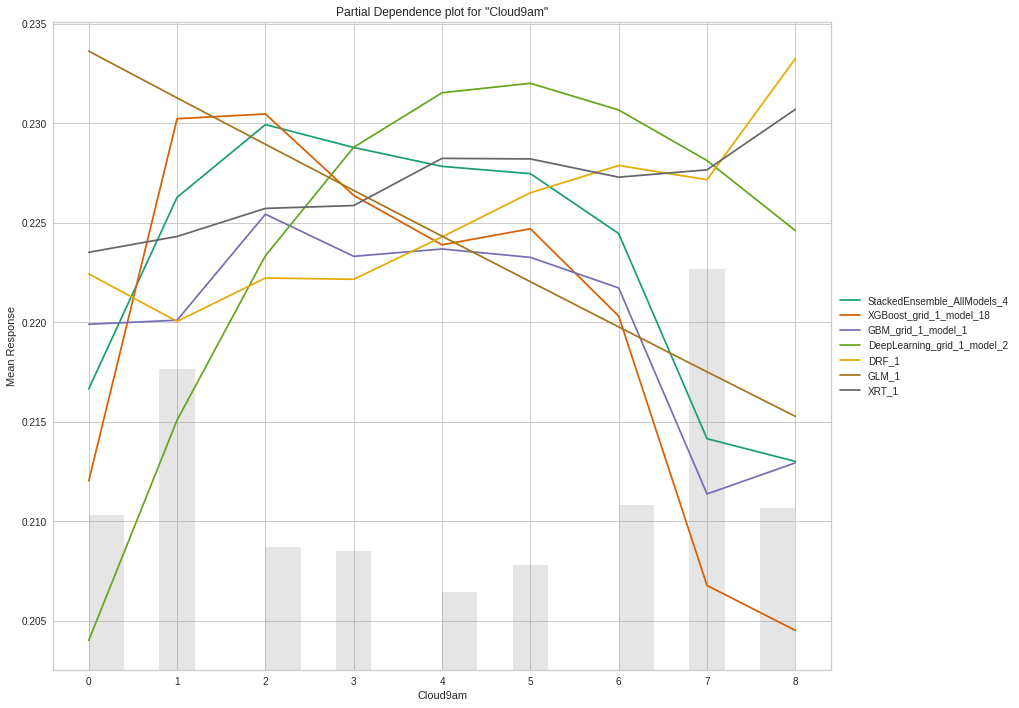

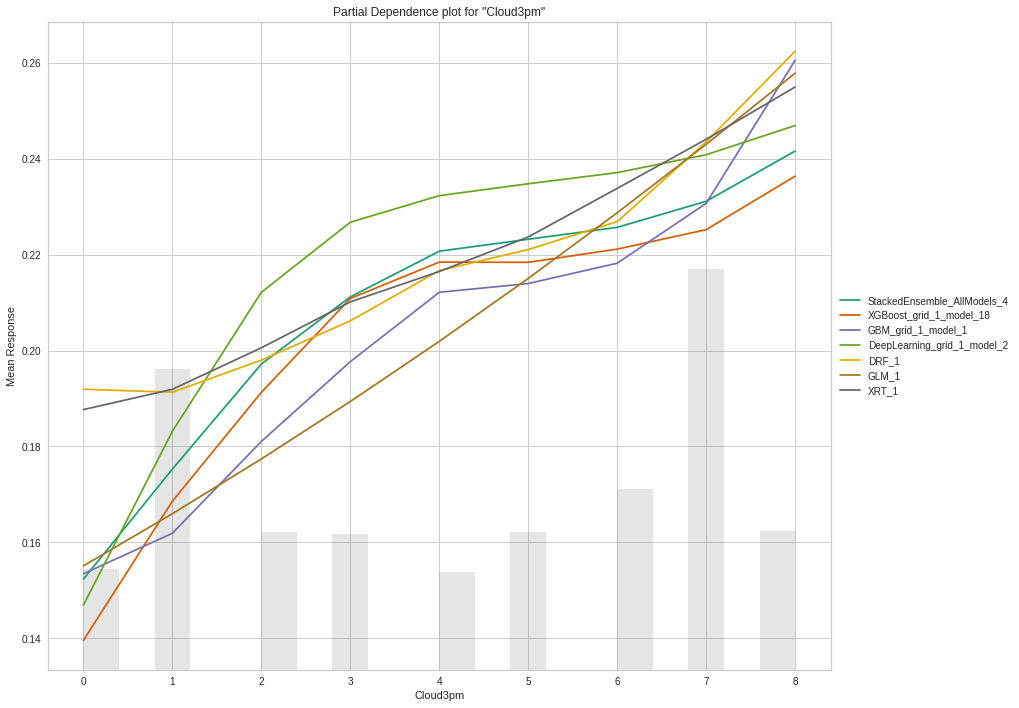

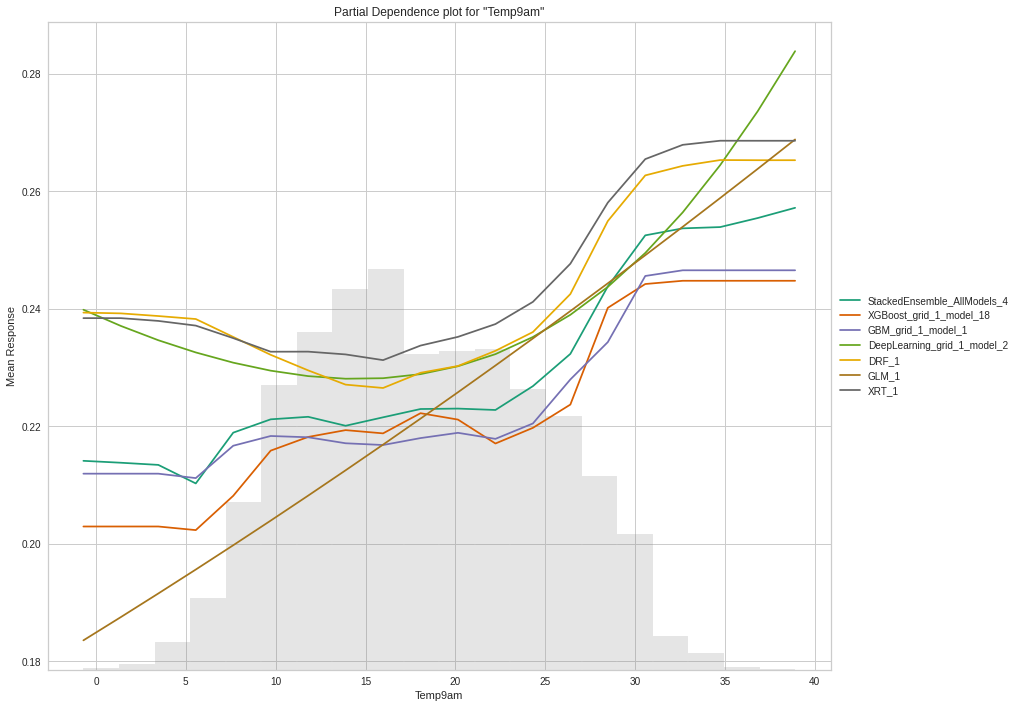

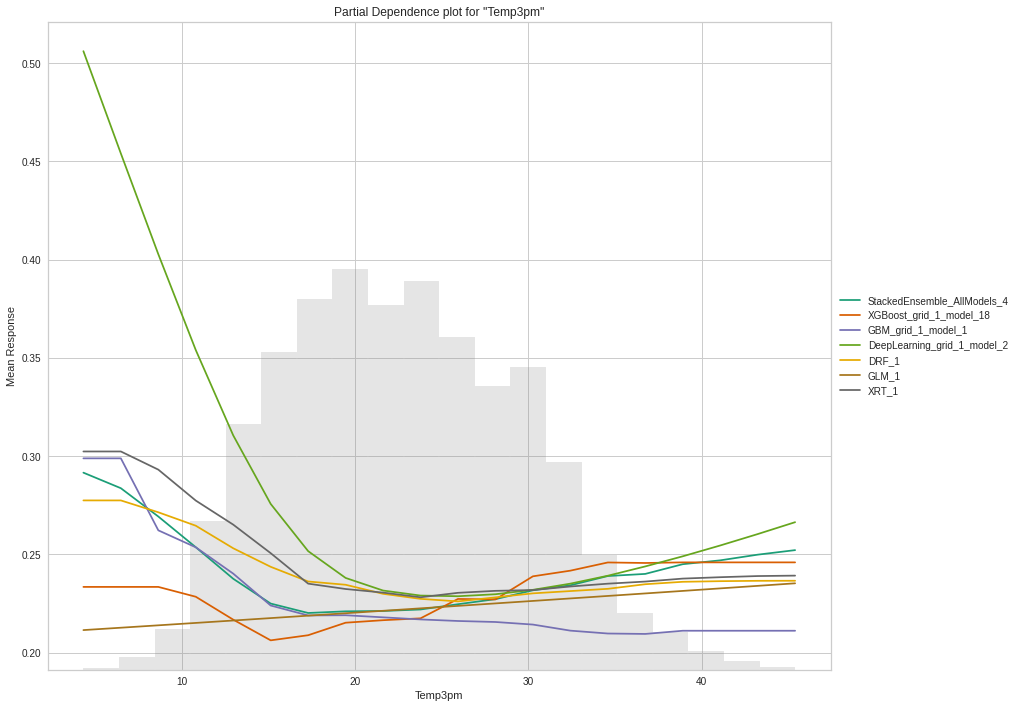

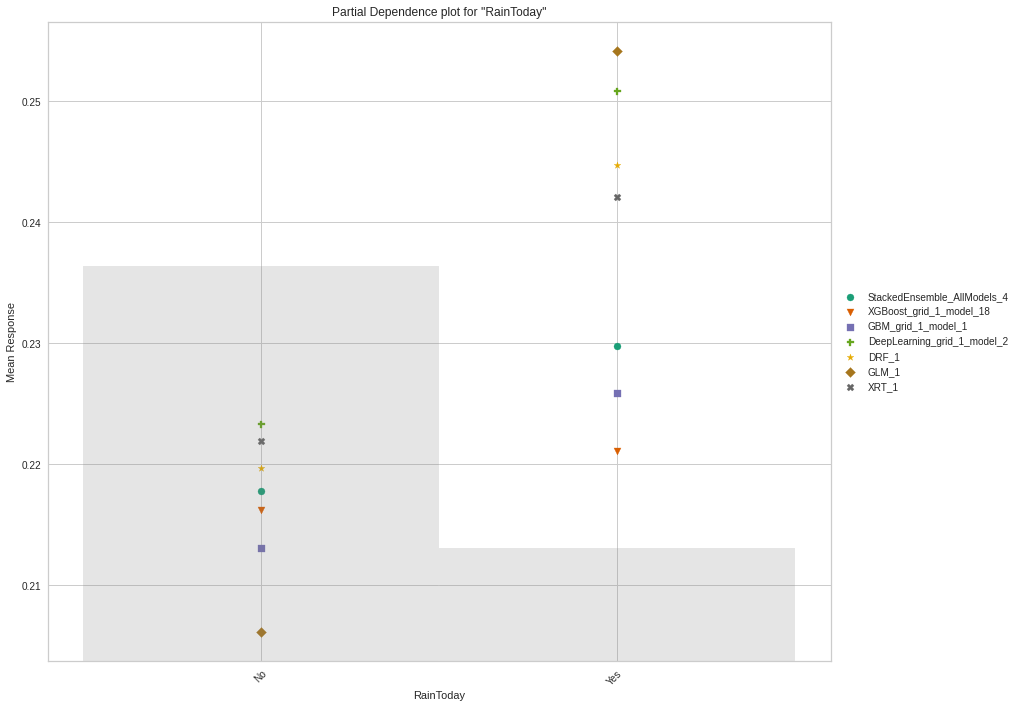

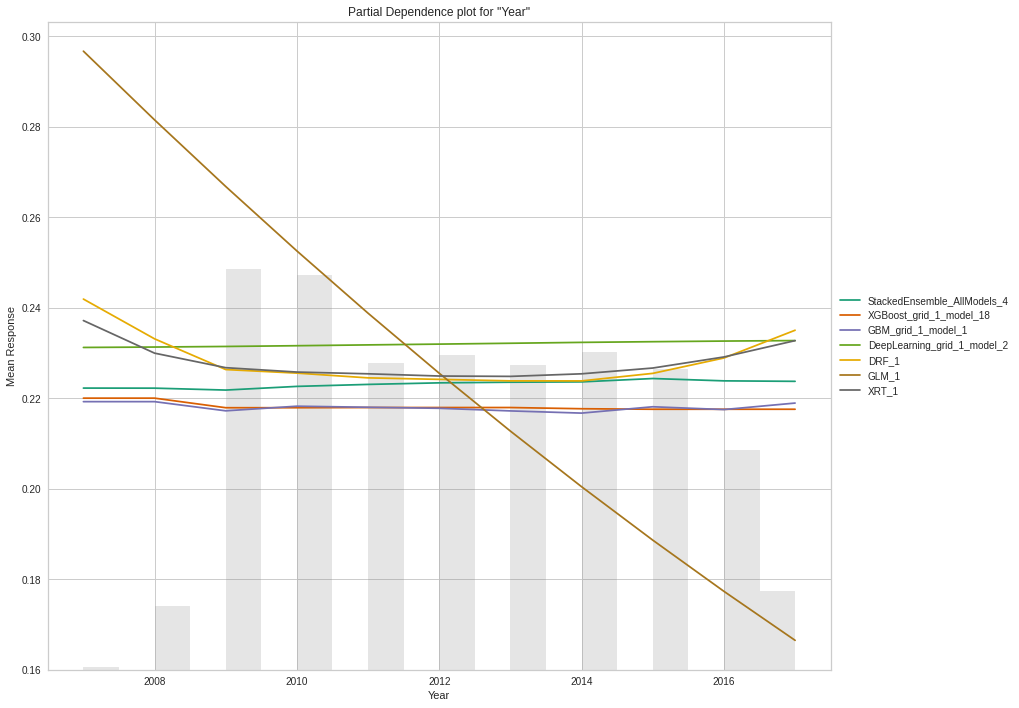

In [ ]:
explain_model = aml.explain(frame = h2o_data_test, figsize = (15,10),include_explanations=['pdp'] )

## Regularization

In [ ]:
from h2o.estimators.glm import H2OGeneralizedLinearEstimator

glm = H2OGeneralizedLinearEstimator(
    family="binomial", lambda_=0, compute_p_values=True, nfolds=4
) 
glm.train(x=X,y=y_cat,training_frame=h2o_data_train)

glm Model Build progress: |██████████████████████████████████████████████████████| (done) 100%


Model Details
=============
H2OGeneralizedLinearEstimator : Generalized Linear Modeling
Model Key: GLM_model_python_1677644357429_1


GLM Model: summary
    family    link    regularization    number_of_predictors_total    number_of_active_predictors    number_of_iterations    training_frame
--  --------  ------  ----------------  ----------------------------  -----------------------------  ----------------------  ----------------
    binomial  logit   None              89                            89                             5                       py_11_sid_86b8

ModelMetricsBinomialGLM: glm
** Reported on train data. **

MSE: 0.10182168173027249
RMSE: 0.31909509825485016
LogLoss: 0.32650361287286056
AUC: 0.8915155145907747
AUCPR: 0.7327739644114591
Gini: 0.7830310291815494
Null degrees of freedom: 48012
Residual degrees of freedom: 47923
Null deviance: 50700.797700086114
Residual deviance: 31352.835929729303
AIC: 31532.835929729303

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.32211289761799367
       No     Yes    Error    Rate
-----  -----  -----  -------  ----------------
No     32923  4486   0.1199   (4486.0/37409.0)
Yes    3109   7495   0.2932   (3109.0/10604.0)
Total  36032  11981  0.1582   (7595.0/48013.0)

Maximum Metrics: Maximum metrics at their respective thresholds
metric                       threshold    value     idx
---------------------------  -----------  --------  -----
max f1                       0.322113     0.663715  215
max f2                       0.130819     0.749786  301
max f0point5                 0.57476      0.695483  129
max accuracy                 0.512666     0.857684  148
max precision                0.996677     1         0
max recall                   0.00468277   1         397
max specificity              0.996677     1         0
max absolute_mcc             0.366757     0.566375  198
max min_per_class_accuracy   0.212681     0.806017  260
max mean_per_class_accuracy  0.196615     0.807263  268
max tns                      0.996677     37409     0
max fns                      0.996677     10568     0
max fps                      0.00240422   37409     399
max tps                      0.00468277   10604     397
max tnr                      0.996677     1         0
max fnr                      0.996677     0.996605  0
max fpr                      0.00240422   1         399
max tpr                      0.00468277   1         397

Gains/Lift Table: Avg response rate: 22.09 %, avg score: 13.97 %
group    cumulative_data_fraction    lower_threshold    lift      cumulative_lift    response_rate    score     cumulative_response_rate    cumulative_score    capture_rate    cumulative_capture_rate    gain        cumulative_gain    kolmogorov_smirnov
-------  --------------------------  -----------------  --------  -----------------  ---------------  --------  --------------------------  ------------------  --------------  -------------------------  ----------  -----------------  --------------------
1        0.0100181                   0.232115           0.696588  0.696588           0.153846         0.245688  0.153846                    0.245688            0.0069785       0.0069785                  -30.3412    -30.3412           -0.00390124
2        0.0200154                   0.185057           1.20742   0.951737           0.266667         0.196317  0.210198                    0.221029            0.0120709       0.0190494                  20.7419     -4.82627           -0.00123982
3        0.0300127                   0.178963           0.688606  0.864088           0.152083         0.181664  0.19084                     0.207916            0.00688419      0.0259336                  -31.1394    -13.5912           -0.00523536
4        0.04001                     0.175267           0.688606  0.82024            0.152083         0.176988  0.181156                    0.200188            0.00688419      0.0328178                  -31.1394    -17.976            -0.0092309
5        0.0500073

In [ ]:
glm._model_json['output']['coefficients_table']

names,coefficients,std_error,z_value,p_value,standardized_coefficients
Intercept,398.2145881,107.6536572,3.6990345,0.0002164,-2.3884700
Location.Brisbane,0.7486938,0.1331437,5.6232004,0.0000000,0.7486938
Location.Cairns,0.4247709,0.1382988,3.0713990,0.0021306,0.4247709
Location.Canberra,0.3084218,0.1614691,1.9100981,0.0561206,0.3084218
Location.Cobar,0.0832402,0.2377403,0.3501309,0.7262405,0.0832402
Location.CoffsHarbour,0.4084137,0.1455249,2.8064861,0.0050085,0.4084137
Location.Darwin,-0.0678033,0.1388280,-0.4883979,0.6252681,-0.0678033
Location.Hobart,-0.2916624,0.1442281,-2.0222301,0.0431526,-0.2916624
Location.Melbourne,0.0796986,0.1410557,0.5650151,0.5720635,0.0796986
Location.MelbourneAirport,-0.2356133,0.1372729,-1.7163867,0.0860913,-0.2356133


### Ridge Regularization

In [ ]:
wine_glm_regularization_ridge = H2OGeneralizedLinearEstimator(
    family="binomial", alpha=0, nfolds=4
)  # RIDGE Regularization
wine_glm_regularization_ridge.train(x=X,y=y_cat,training_frame=h2o_data_train)


glm Model Build progress: |██████████████████████████████████████████████████████| (done) 100%


Model Details
=============
H2OGeneralizedLinearEstimator : Generalized Linear Modeling
Model Key: GLM_model_python_1677644357429_67


GLM Model: summary
    family    link    regularization               number_of_predictors_total    number_of_active_predictors    number_of_iterations    training_frame
--  --------  ------  ---------------------------  ----------------------------  -----------------------------  ----------------------  ----------------
    binomial  logit   Ridge ( lambda = 1.893E-4 )  94                            94                             5                       py_11_sid_86b8

ModelMetricsBinomialGLM: glm
** Reported on train data. **

MSE: 0.10183421926045338
RMSE: 0.3191147430947893
LogLoss: 0.3265451297760881
AUC: 0.8914741883533011
AUCPR: 0.7327446040900795
Gini: 0.7829483767066021
Null degrees of freedom: 48012
Residual degrees of freedom: 47918
Null deviance: 50700.797700086114
Residual deviance: 31356.82263187864
AIC: 31546.82263187864

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.31418020404931624
       No     Yes    Error    Rate
-----  -----  -----  -------  ----------------
No     32765  4644   0.1241   (4644.0/37409.0)
Yes    3036   7568   0.2863   (3036.0/10604.0)
Total  35801  12212  0.16     (7680.0/48013.0)

Maximum Metrics: Maximum metrics at their respective thresholds
metric                       threshold    value     idx
---------------------------  -----------  --------  -----
max f1                       0.31418      0.663394  222
max f2                       0.135241     0.750147  302
max f0point5                 0.568752     0.695607  133
max accuracy                 0.524314     0.85783   148
max precision                0.996958     1         0
max recall                   0.00495002   1         397
max specificity              0.996958     1         0
max absolute_mcc             0.364046     0.565345  202
max min_per_class_accuracy   0.212442     0.806036  264
max mean_per_class_accuracy  0.199983     0.807702  270
max tns                      0.996958     37409     0
max fns                      0.996958     10575     0
max fps                      0.00281568   37409     399
max tps                      0.00495002   10604     397
max tnr                      0.996958     1         0
max fnr                      0.996958     0.997265  0
max fpr                      0.00281568   1         399
max tpr                      0.00495002   1         397

Gains/Lift Table: Avg response rate: 22.09 %, avg score: 22.09 %
group    cumulative_data_fraction    lower_threshold    lift       cumulative_lift    response_rate    score       cumulative_response_rate    cumulative_score    capture_rate    cumulative_capture_rate    gain      cumulative_gain    kolmogorov_smirnov
-------  --------------------------  -----------------  ---------  -----------------  ---------------  ----------  --------------------------  ------------------  --------------  -------------------------  --------  -----------------  --------------------
1        0.0100181                   0.964582           4.37721    4.37721            0.966736         0.979374    0.966736                    0.979374            0.0438514       0.0438514                  337.721   337.721            0.0434237
2        0.0200154                   0.936271           4.24483    4.31109            0.9375           0.950561    0.952133                    0.964982            0.0424368       0.0862882                  324.483   331.109            0.0850585
3        0.0300127                   0.908869           4.18823    4.27016            0.925            0.922618    0.943095                    0.950871            0.041871        0.128159                   318.823   327.016            0.125967
4        0.04001                     0.881717           4.14107    4.23791            0.914583         0.89498     0.935971                    0.936905            0.0413995       0.169559                   314.107   323.791            

### Lasso Regularization

In [ ]:
wine_glm_regularization_lasso = H2OGeneralizedLinearEstimator(
    family="binomial", alpha=1, nfolds=4
)  # LASSO Regularization
wine_glm_regularization_lasso.train(x=X,y=y_cat,training_frame=h2o_data_train)

glm Model Build progress: |██████████████████████████████████████████████████████| (done) 100%


Model Details
=============
H2OGeneralizedLinearEstimator : Generalized Linear Modeling
Model Key: GLM_model_python_1677644357429_52


GLM Model: summary
    family    link    regularization              number_of_predictors_total    number_of_active_predictors    number_of_iterations    training_frame
--  --------  ------  --------------------------  ----------------------------  -----------------------------  ----------------------  ----------------
    binomial  logit   Lasso (lambda = 1.893E-4 )  94                            74                             6                       py_11_sid_86b8

ModelMetricsBinomialGLM: glm
** Reported on train data. **

MSE: 0.10192040300637444
RMSE: 0.31924975020565705
LogLoss: 0.32693601982522186
AUC: 0.8911332100261024
AUCPR: 0.7324333547918046
Gini: 0.7822664200522047
Null degrees of freedom: 48012
Residual degrees of freedom: 47938
Null deviance: 50700.797700086114
Residual deviance: 31394.358239736754
AIC: 31544.358239736754

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.3368054897235286
       No     Yes    Error    Rate
-----  -----  -----  -------  ----------------
No     33231  4178   0.1117   (4178.0/37409.0)
Yes    3275   7329   0.3088   (3275.0/10604.0)
Total  36506  11507  0.1552   (7453.0/48013.0)

Maximum Metrics: Maximum metrics at their respective thresholds
metric                       threshold    value     idx
---------------------------  -----------  --------  -----
max f1                       0.336805     0.662928  211
max f2                       0.151455     0.749769  291
max f0point5                 0.566743     0.695891  132
max accuracy                 0.505618     0.857809  152
max precision                0.997064     1         0
max recall                   0.00519047   1         397
max specificity              0.997064     1         0
max absolute_mcc             0.357082     0.564192  203
max min_per_class_accuracy   0.213658     0.806758  262
max mean_per_class_accuracy  0.201607     0.807692  267
max tns                      0.997064     37409     0
max fns                      0.997064     10577     0
max fps                      0.00280203   37409     399
max tps                      0.00519047   10604     397
max tnr                      0.997064     1         0
max fnr                      0.997064     0.997454  0
max fpr                      0.00280203   1         399
max tpr                      0.00519047   1         397

Gains/Lift Table: Avg response rate: 22.09 %, avg score: 22.09 %
group    cumulative_data_fraction    lower_threshold    lift       cumulative_lift    response_rate    score       cumulative_response_rate    cumulative_score    capture_rate    cumulative_capture_rate    gain      cumulative_gain    kolmogorov_smirnov
-------  --------------------------  -----------------  ---------  -----------------  ---------------  ----------  --------------------------  ------------------  --------------  -------------------------  --------  -----------------  --------------------
1        0.0100181                   0.964321           4.36779    4.36779            0.964657         0.978951    0.964657                    0.978951            0.0437571       0.0437571                  336.779   336.779            0.0433026
2        0.0200154                   0.935473           4.2637     4.3158             0.941667         0.949532    0.953174                    0.964257            0.0426254       0.0863825                  326.37    331.58             0.0851796
3        0.0300127                   0.906763           4.2071     4.27959            0.929167         0.921436    0.945177                    0.949993            0.0420596       0.128442                   320.71    327.959            0.12633
4        0.04001                     0.879976           4.11277    4.23791            0.908333         0.893656    0.935971                    0.935916            0.0411166       0.169559                   311.277   323.791            0

# Questions

### Answers

---
\


* *Is the relationship significant?*
  * From the results of OLS regression we observed the p-value. Based on this we can say that Location, MinTemp, Sunshine, WindGustDir, WindSpeed9am, Humidity3pm, Cloud9am, Temp9am show high relationship significance.

* *Are any model assumptions violated?*
  * The assumption is that the target value is binomial which is satisfied.
  * We assume linearity of independent variables and log-odds, however some variables have low p-value - WindSpeed9am, Humidity3pm, these can be transformed by incorporating higher-order polynomial terms.
  * Absence of Multicollinearity - high VIF value is observed for variables like Pressure9am,Pressure3pm, Temp9am, Temp3pm, MaxTemp which violate this assumption.

* *Is there any multicollinearity in the model?*
  * We can see there is high VIF in Pressure9am, Pressure3pm, Temp9am, Temp3pm, MaxTemp etc. We need to use regularization to reduce the impact of multicolinearity by either removing or transforming them.

* *In the multivariate models are predictor variables independent of all the other predictor variables?*
  * Since there is high VIF value, we know that some of the predictor variables are not independant of other predictor variables.

* *In multivariate models rank the most significant predictor variables and exclude insignificant ones from the model.*
  * Huimidity3pm, Pressure9am, WindGustSpeed, Pressure3pm, Sunshine and LocationPerth are the most significant predictor variables.

* *Does the model make sense?*
  * The highest performing models were Stacked Ensemble and GBM. 
The stacked ensemble used GBM, XGBoost, DRF, DeepLearning which makes sense as this is a classification prediction problem.

* *Does regularization help?*
  * Lasso/Ridge regularization did not make any difference to the model using GLM

* *Which independent variables are significant?*
  * Huimidity3pm, WindGustSpeed, Sunshine and LocationPerth are the most significant independant predictor variables.

* *Which hyperparameters are important?*
  * We kept nfolds at 4 to avoid overfitting.

# References:

* https://github.com/aiskunks/YouTube/blob/main/A_Crash_Course_in_Statistical_Learning/AutoML/AutoML_Wine_Quality.ipynb 

* https://github.com/aiskunks/YouTube/blob/main/A_Crash_Course_in_Statistical_Learning/AutoML/AutoML_Smoke_Detection_Example.ipynb 

* https://docs.h2o.ai/h2o/latest-stable/h2o-docs/automl.html 

* https://docs.h2o.ai/h2o/latest-stable/h2o-docs/data-science/glm.html 

* https://towardsdatascience.com/automated-machine-learning-with-h2o-258a2f3a203f







### MIT License

Copyright (c) 2023 Shabina Singh and AISkunks

Permission is hereby granted, free of charge, to any person obtaining a copy of this software and associated documentation files (the "Software"), to deal in the Software without restriction, including without limitation the rights to use, copy, modify, merge, publish, distribute, sublicense, and/or sell copies of the Software, and to permit persons to whom the Software is furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY, FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE SOFTWARE.